# 乳腺癌良性恶性诊断

## 数据处理

import pandas as pd: 导入Pandas库，并将其简称为pd。Pandas是一个强大的数据处理和分析库，常用于处理表格数据。

import numpy as np: 导入NumPy库，并将其简称为np。NumPy是一个用于科学计算的库，支持多维数组和矩阵运算，提供大量数学函数。

import seaborn as sns: 导入Seaborn库，并将其简称为sns。Seaborn是一个基于Matplotlib的统计数据可视化库，提供更高级、更美观的图形。

import matplotlib.pyplot as plt: 导入Matplotlib库中的pyplot模块，并将其简称为plt。Matplotlib是一个绘图库，pyplot模块提供类似于MATLAB的绘图API。

import missingno as msno: 导入Missingno库，并将其简称为msno。Missingno用于可视化缺失数据，帮助用户更好地了解数据缺失的情况。

import warnings: 导入Python内置的warnings模块，用于处理警告信息。

warnings.filterwarnings('ignore'): 忽略所有警告信息。在分析过程中，有时会出现一些不重要的警告信息，为了避免这些警告干扰，可以选择忽略它们。

sns.set(): 设置Seaborn的默认主题、缩放比例和调色板，使绘图更加美观。

plt.style.use('ggplot'): 使用Matplotlib的ggplot样式。ggplot是一种流行的绘图风格，受R语言中的ggplot2启发，图形更具吸引力和易读性。和可视化库，并设置了一些全局参数，以便于后续的数据分析和可视化工作。

In [3]:
# 导入必要的包
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')

pd.read_csv("data.csv"): 使用Pandas库的read_csv函数读取名为data.csv的CSV文件。read_csv函数会将CSV文件中的数据读取并转换为一个DataFrame对象，DataFrame是Pandas中用于存储二维数据的主要数据结构，类似于电子表格或数据库中的表格。

In [4]:
df = pd.read_csv("data.csv")

df.head() 是Pandas库中的一个方法，用于查看DataFrame对象的前几行数据。默认情况下，它会显示前5行数据。

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


df.diagnosis.unique() 是 pandas 库中的一个函数调用，用于获取 DataFrame 中指定列的唯一值

In [6]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

df.describe() 是 pandas 库中的一个函数，用于生成 DataFrame 各列的统计摘要。它主要用于快速了解数据的分布情况，包括统计量如均值、标准差、最小值、四分位数和最大值等。

In [7]:
# 统计数据分布情况 
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


df.info() 是 pandas 库中的一个方法，用于快速了解 DataFrame 的简要信息。它提供有关 DataFrame 列的基本概述，包括列名、数据类型、非空值数量以及内存使用情况。

In [8]:
# 提供有关 df 列的基本概述，包括列名、数据类型、非空值数量以及内存使用情况。
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

df.isnull().sum() 是 pandas 库中的一个函数调用，用于检测 DataFrame 中的缺失值。它会返回每列中缺失值的数量

In [9]:
# 缺失数据
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

plt.rcParams['font.sans-serif'] = ['SimHei']：设置Matplotlib的全局参数font.sans-serif，指定字体为SimHei（黑体），以确保绘图时能正确显示中文。
plt.rcParams['axes.unicode_minus'] = False：设置Matplotlib的全局参数axes.unicode_minus为False，以确保负号能正确显示

msno.bar(df, color="red") 是使用 missingno 库来可视化 DataFrame 缺失值情况的一种方法。missingno 提供了一些简单且直观的图表，用于了解数据中的缺失值分布情况。msno.bar 函数绘制一个条形图，每个条代表 DataFrame 中的一列，高度表示该列中非缺失值的数量。

<Axes: title={'center': '缺失数据条形图-丁梓萱'}>

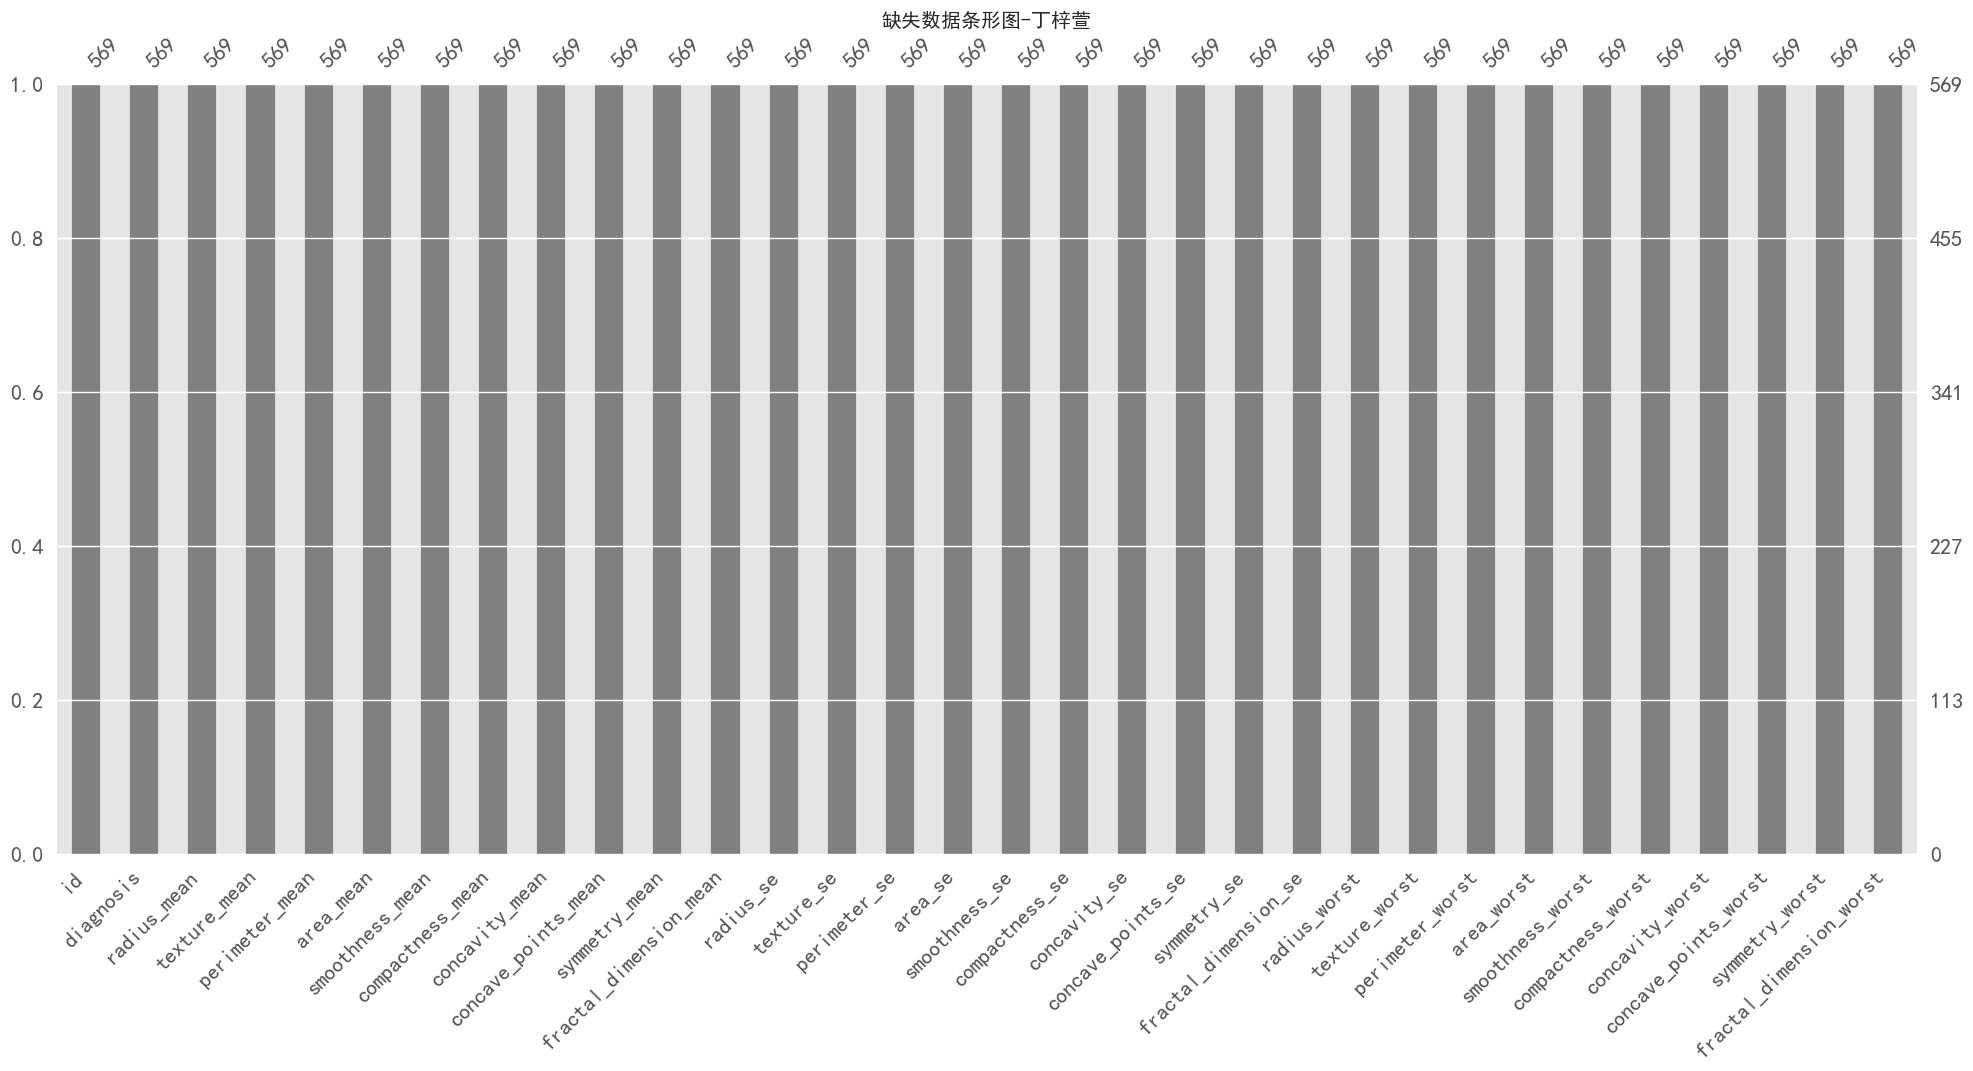

In [10]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
plt.title('缺失数据条形图-丁梓萱') 
msno.bar(df, color="gray")

In [11]:
# 由上图可知，我们所使用的数据集没有缺失数据

将DataFrame df 中 diagnosis 列的值进行二值化处理，将分类标签转换为数值标签，将'M'转换为1，将其他值（假设为'B'）转换为0。

In [12]:
# 将diagnosis转换为数值类型，便于后续处理
df['diagnosis'] = df['diagnosis'].apply(lambda val:1 if val=='M' else 0)

使用 value_counts() 方法来统计 diagnosis 列中每个唯一值的出现次数，并打印出来  显示图表

使用value_counts方法检查 diagnosis列的转换结果，显示每个值的计数。

plt.hist(df['diagnosis'], bins=2, edgecolor='black'): 绘制直方图，bins=2表示将数据分成2个柱，edgecolor='black'设置柱的边缘颜色为黑色。

plt.title('诊断柱状图-丁梓萱'): 设置图表标题。

plt.xlabel('Diagnosis'): 设置X轴标签为Diagnosis。

plt.ylabel('Number'): 设置Y轴标签为Number

plt.xticks([0, 1], ['B', 'M']): 设置X轴刻度标签为0和1，并分别标记为B和M

plt.show(): 显示图表。


Converted diagnosis values:
diagnosis
0    357
1    212
Name: count, dtype: int64


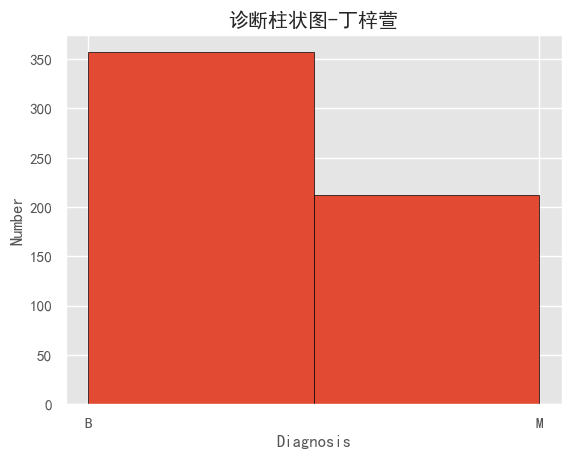

In [13]:
# 检查转换后的 diagnosis 列
print("\nConverted diagnosis values:")
print(df['diagnosis'].value_counts())

# 绘制 diagnosis 列的直方图
plt.hist(df['diagnosis'], bins=2, edgecolor='black')
plt.title('诊断柱状图-丁梓萱')
plt.xlabel('Diagnosis')
plt.ylabel('Number')
plt.xticks([0, 1], ['B', 'M'])
plt.show()

### 数据分布

对数据集中每一列都绘制分布图，为了显示方便，将这些图排列成一个 5 行 6 列的网格

plt.figure(figsize=(20,15)): 创建一个新的图形对象，指定图形的大小为20x15英寸。
plotnumber=1 设置一个计数器，用于跟踪当前子图的编号。
for column in df:: 遍历数据集中的每一列（即每个特征。 if plotnumber<=30:: 确保只绘制前30个特征，以免图形过于拥挤。 ax = plt.subplot(5,6, plotnumber): 在图形中创建一个子图，5行6列的布局，当前子图的编号由plotnumber确定。 sns.distplot(df[column]): 使用Seaborn的distplot函数绘制当前特征的分布曲线和直方。 plt.xlabel(column): 设置当前子图的x轴标签为当前特征的名称。 plotnumber+=1: 更新子图编号，以便绘制下一个特征的分布情况
。 plt.tight_layout(): 自动调整子图的布局，以便更好地适应图形区域
。 plt.show(): 显示绘制的图形。

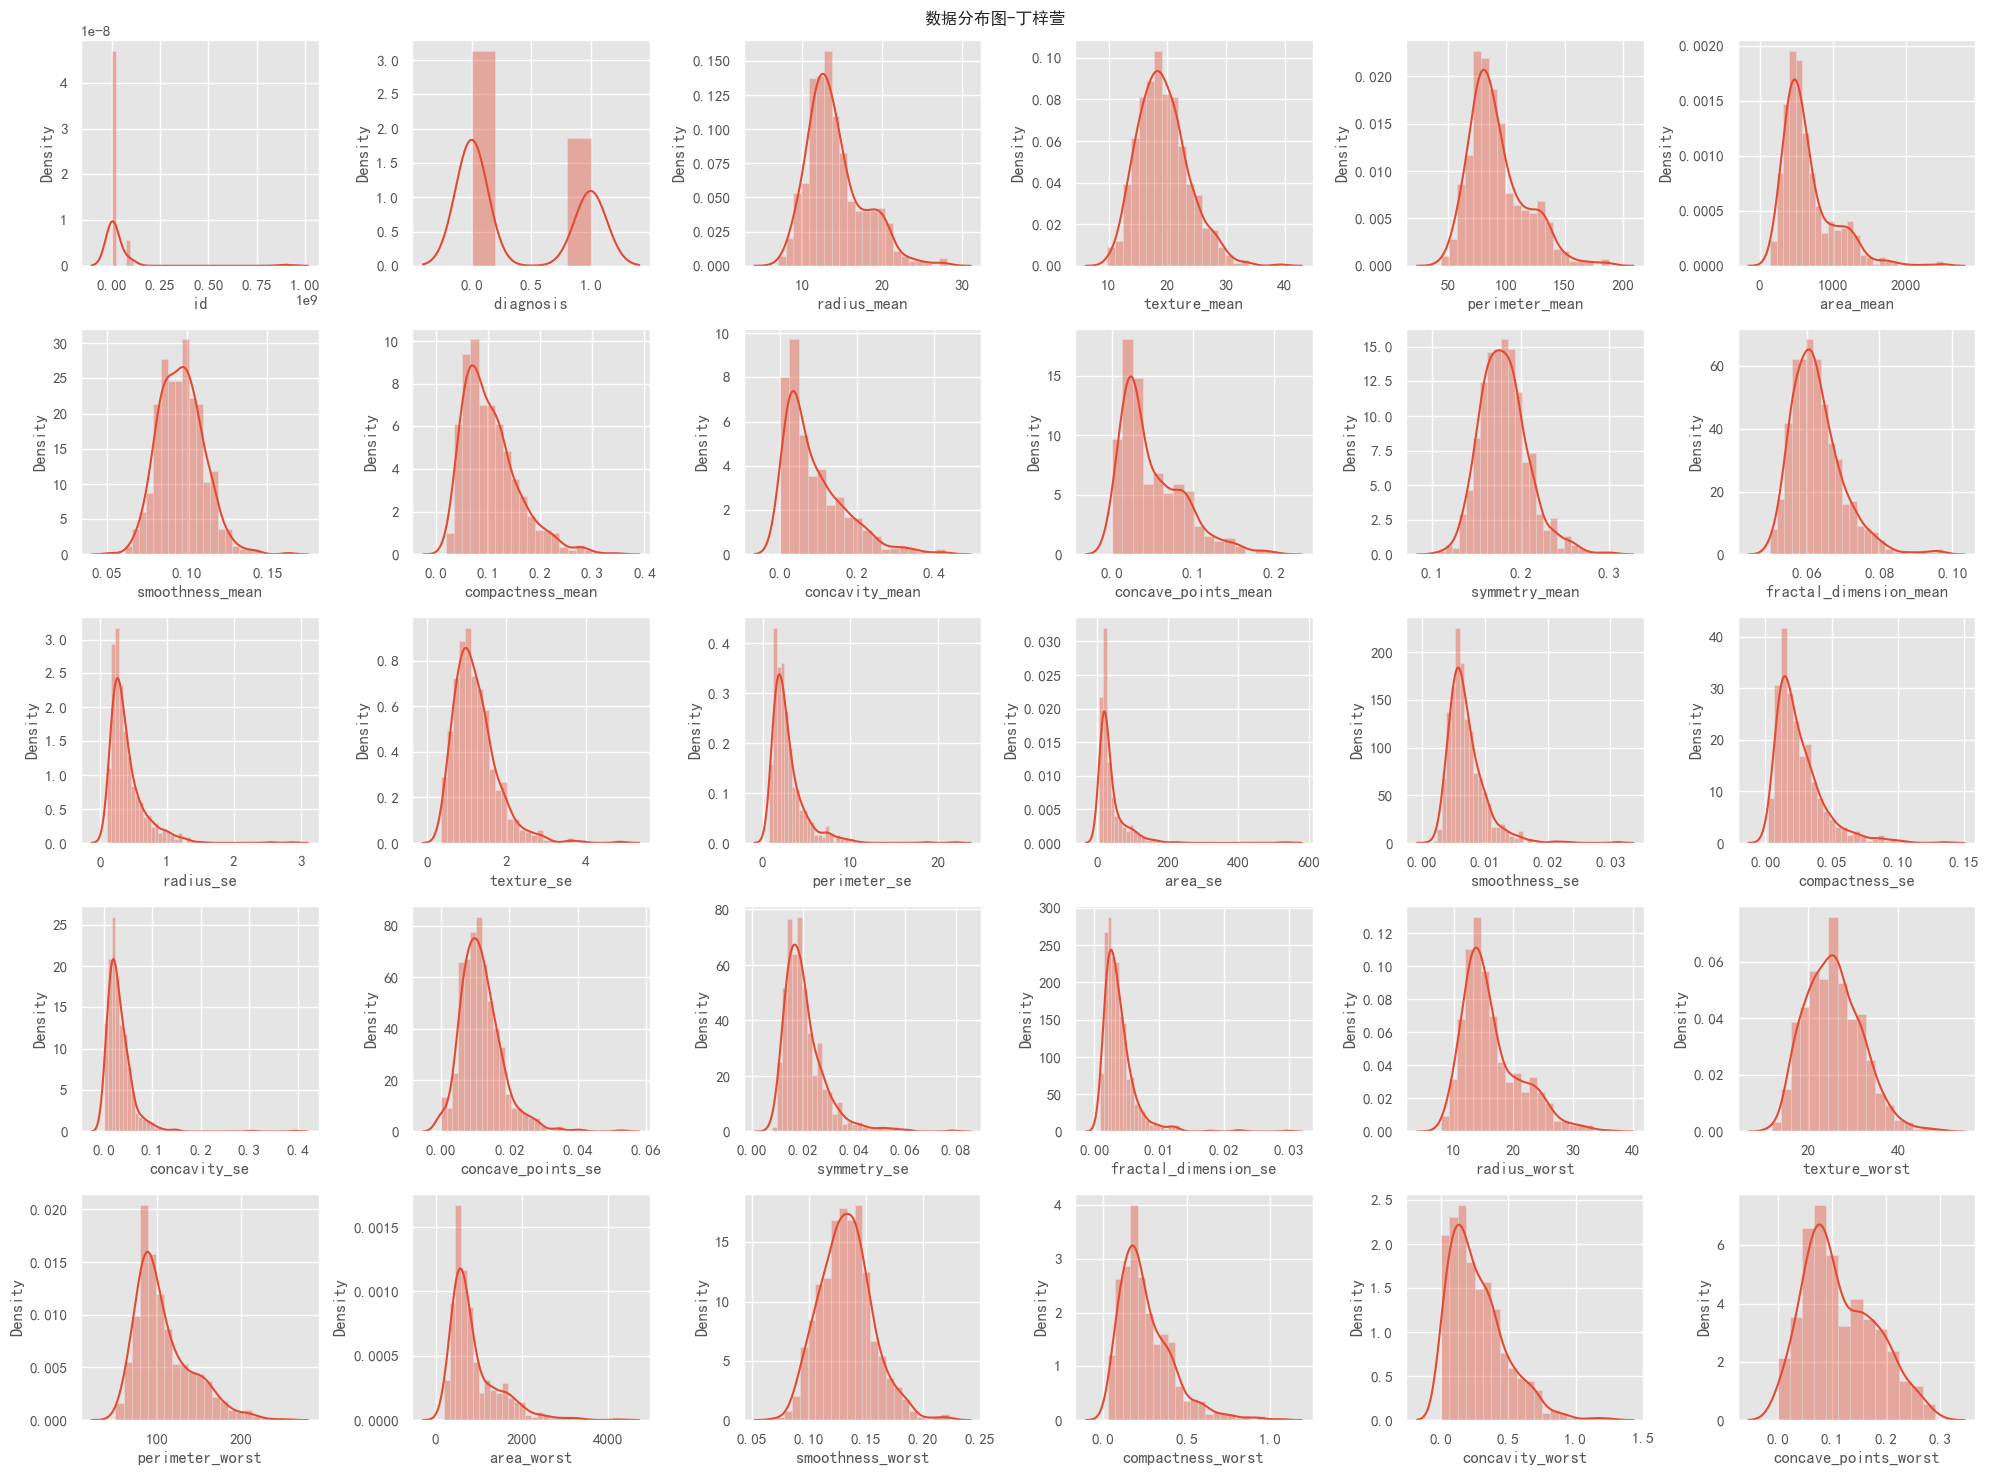

In [14]:
plt.figure(figsize=(20,15))
plt.suptitle('数据分布图-丁梓萱')
plotnumber=1
for column in df:
    if plotnumber<=30:
        ax = plt.subplot(5,6, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
    plotnumber+=1

plt.tight_layout()
plt.show()

## 分析变量间的相关性

df.corr() 是 pandas 库中的一个方法，用于计算 DataFrame 数值型列之间的相关系数矩阵。相关系数矩阵显示了每对列之间的相关性程度，通常用于探索和分析数据的线性关系。

In [15]:
df.corr()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


plt.figure(figsize=(20,12)): 创建一个新的图形对象，指定图形的大小为20x12英寸。 
corr=df.corr(): 计算数据集中各个特征之间的相关系数，得到一个相关系数矩阵。 
mask = np.triu(np.ones_like(corr, dtype=bool)): 创建一个上三角形的布尔矩阵，用于遮挡热图中的下三角部分，以保证对角线以上的相关系数可见，而对角线以下的相关系数对称。 
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt = ".2f"): 使用Seaborn库的heatmap函数绘制相关性热图。参数corr指定了要绘制的相关系数矩阵，mask参数用于遮挡下三角部分，linewidths参数指定了热图中每个单元格之间的线宽，annot=True表示在每个单元格上显示相关系数的数值，fmt=".2f"指定了显示数值的格式为保留两位小数。 plt.show(): 显示绘制的热图。

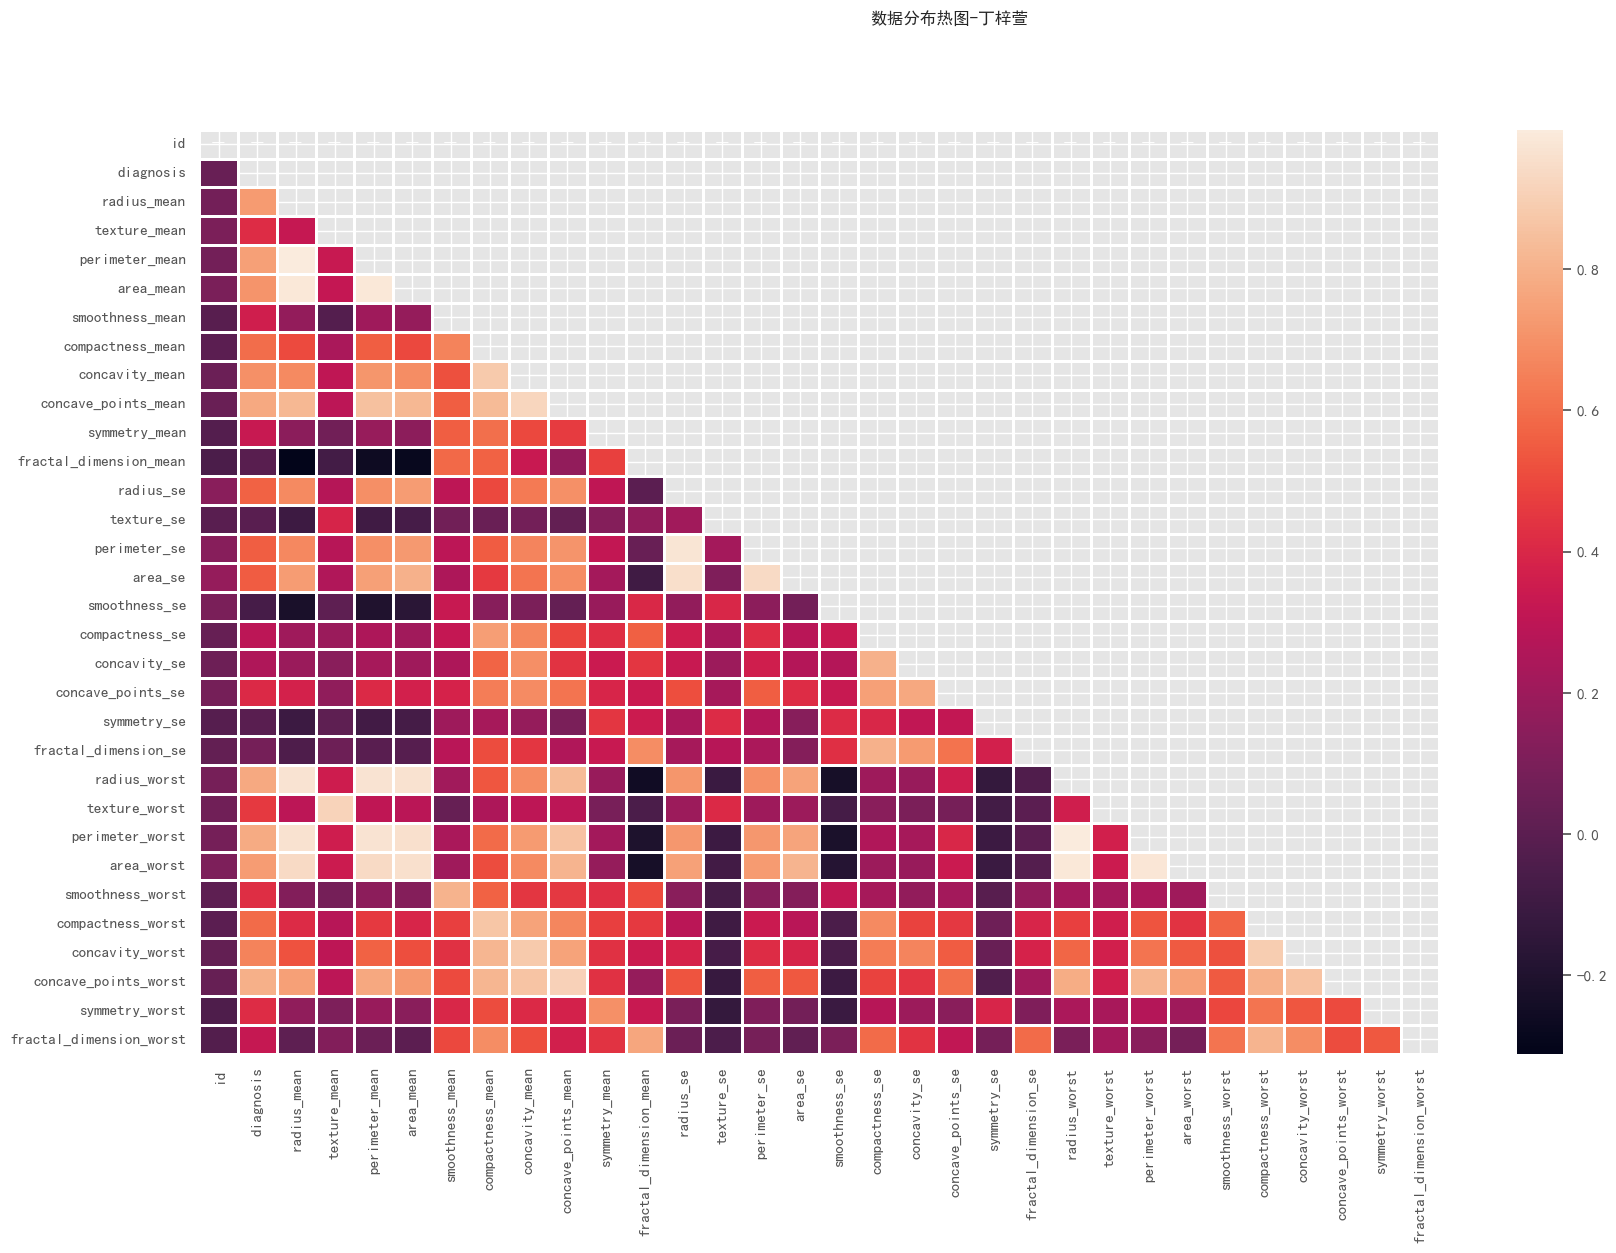

In [16]:
plt.figure(figsize=(20,12))
plt.suptitle('数据分布热图-丁梓萱')
corr=df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, linewidths=1, annot=True, fmt = ".2f")
plt.show()

In [17]:
df.drop('id', axis=1, inplace=True)

特征选择，有助于减少特征冗余，提高模型的性能和训练速度。

corr_matrix = df.corr().abs(): 首先，计算数据集中各个特征之间的绝对相关系数矩阵。

mask = np.triu(np.ones_like(corr_matrix, dtype=bool)): 创建一个与相关系数矩阵形状相同的上三角形布尔矩阵，这个矩阵将用于遮盖相关系数矩阵中的下三角部分。

tri_df = corr_matrix.mask(mask): 使用上三角形布尔矩阵对相关系数矩阵进行遮盖，生成一个仅包含上三角部分数据的DataFrame。

to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)]: 遍历上三角形部分的DataFrame的列，找出与其他特征相关性超过0.92的特征，并将它们加入到要删除的特征列表中。

df = df.drop(to_drop, axis=1): 最后，根据要删除的特征列表，从原始数据集中删除这些特征，得到一个经过特征选择的新数据集。

print(df.shape[1]): 打印经过特征选择后的新数据集中的特征数量。

In [18]:
# 特征选择
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

to_drop = [x for x in tri_df.columns if any(tri_df[x]>0.92)]

df = df.drop(to_drop, axis=1)

print(df.shape[1])

23


In [19]:
# 展示修改后的数据
df.head()

,diagnosis,texture_mean,smoothness_mean,compactness_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,0.11840,0.27760,0.14710,0.2419,0.07871,0.9053,153.40,0.006399,...,0.03003,0.006193,17.33,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,0.08474,0.07864,0.07017,0.1812,0.05667,0.7339,74.08,0.005225,...,0.01389,0.003532,23.41,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,0.10960,0.15990,0.12790,0.2069,0.05999,0.7869,94.03,0.006150,...,0.02250,0.004571,25.53,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,0.14250,0.28390,0.10520,0.2597,0.09744,1.1560,27.23,0.009110,...,0.05963,0.009208,26.50,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,0.10030,0.13280,0.10430,0.1809,0.05883,0.7813,94.44,0.011490,...,0.01756,0.005115,16.67,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 构建模型

In [20]:
X=df.drop('diagnosis', axis=1)
y=df['diagnosis']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test =train_test_split(X,y, test_size=0.2, random_state=0)

from sklearn.preprocessing import StandardScaler: 导入Scikit-learn库中的StandardScaler类，用于特征标准化。

scaler = StandardScaler(): 创建一个StandardScaler对象，该对象将用于对特征进行标准化处理。

X_train = scaler.fit_transform(X_train): 使用fit_transform方法对训练集的特征进行标准化处理。fit_transform方法首先对训练集进行拟合，计算训练集中每个特征的均值和标准差，然后对训练集的特征进行标准化转换。标准化转换的公式为：(x - mean) / std，其中x是原始特征值，mean是特征的均值，std是特征的标准差。

X_test = scaler.transform(X_test): 使用transform方法对测试集的特征进行标准化处理。transform方法使用之前fit_transform方法得到的均值和标准差对测试集的特征进行标准化转换，保证了训练集和测试集的特征使用了相同的转换规则。

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
X_train.shape

(455, 22)

# 1.逻辑回归(丁文静)

第一步：构建逻辑回归模型 （1）使用sklearn.linear_model中的LogisticRegression()初始化一个逻辑回归模型。 （2）使用fit()方法在训练数据X_train和y_train上训练模型。

In [84]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

第二步：进行预测 （1）在训练模型后，使用predict()方法对测试数据X_test进行预测。 （2）预测的值存储在y_pred数组中。

In [85]:
y_pred = log_reg.predict(X_test)

In [86]:
#输出预测结果
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0], dtype=int64)

第三步：模型评估 （1）代码从sklearn.metrics中导入准确率、混淆矩阵和分类报告等指标。 （2）使用accuracy_score(y_train, log_reg.predict(X_train))计算模型在训练集上的准确率。 （3）计算并存储模型在测试集上的准确率为log_reg_acc。 （4）使用confusion_matrix和classification_report计算并打印混淆矩阵、精确度、召回率和F1分数

In [87]:
#评估模型
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, log_reg.predict(X_train)))
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
print(log_reg_acc)
y_pred = log_reg.predict(X_test)

#输出准确率、混淆矩阵和分类报告 可见逻辑回归分类准确率为96.5%
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.989010989010989
0.9649122807017544
[[66  1]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



第四部分：可视化 （1）使用matplotlib和seaborn库来创建混淆矩阵的图像。 （2）利用Seaborn库的barplot函数创建一个条形图展示召回率。

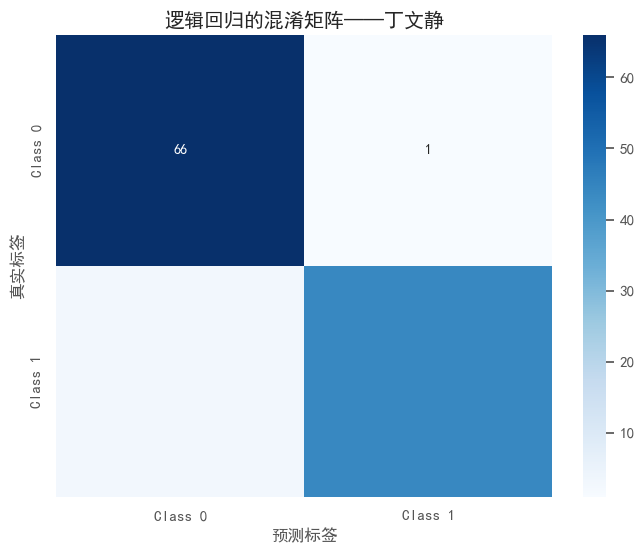

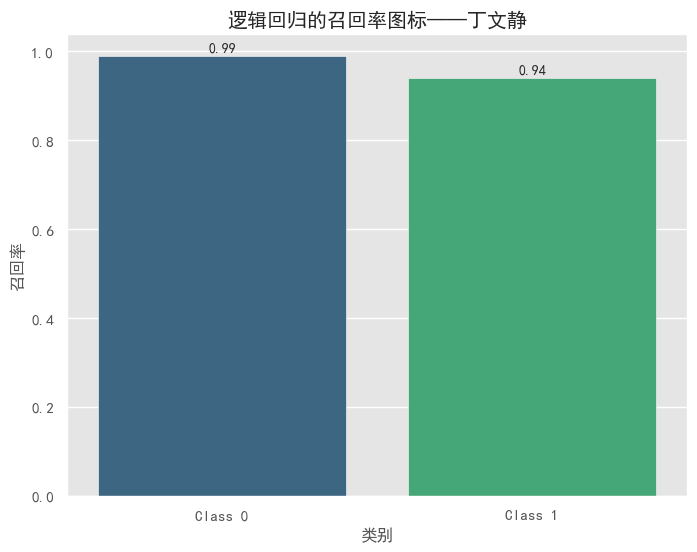

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

#1.混淆矩阵
# 混淆矩阵数据
conf_matrix = np.array([[66, 1],
                        [3, 44]])

# 创建热图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

# 添加标题和标签
plt.title('逻辑回归的混淆矩阵——丁文静')
plt.xlabel('预测标签')
plt.ylabel('真实标签')

# 显示图表
plt.show()

#2.召回率分析
# 分类报告中的数据
class_labels = ['Class 0', 'Class 1']
recall = [0.99, 0.94]  # 根据classification_report中的召回率填写

# 创建条形图
plt.figure(figsize=(8, 6))
sns.barplot(x=class_labels, y=recall, palette='viridis')

# 添加标题和标签
plt.title('逻辑回归的召回率图标——丁文静')
plt.ylabel('召回率')
plt.xlabel('类别')

# 显示数值标签
for i, v in enumerate(recall):
    plt.text(i, v + 0.01, str(round(v, 2)), ha='center')

# 显示图表
plt.show()

关于逻辑回归： （1）优点：逻辑回归是一种简单且可解释的算法，适用于二元分类任务。它提供结果的概率，并能处理数值和分类特征。 （2）缺点：逻辑回归假设特征与结果的对数几率之间存在线性关系。在数据中存在复杂关系时可能表现不佳。

以上部分的总结： 1.模型构建：使用 LogisticRegression() 从 sklearn.linear_model 初始化逻辑回归模型，并通过 fit() 方法在训练集 X_train 和 y_train 上进行训练。 2.预测：模型通过 predict() 方法对测试集 X_test 进行预测，预测结果存储在数组 y_pred 中。 3.评估：从 sklearn.metrics 导入评估指标，包括准确率、混淆矩阵和分类报告。计算模型在训练集上的准确率，并存储模型在测试集上的准确率 log_reg_acc。 输出混淆矩阵和分类报告，显示精确度、召回率和F1分数。 4.可视化： （1）混淆矩阵热图：显示模型预测与实际标签之间的关系，对角线元素表示正确预测，非对角线元素表示错误分类。 （2）召回率条形图：展示模型对每个类别的召回率，即正确预测为正类的比例。 5性能分析：模型在测试集上的准确率为 96.5%，表明模型具有较高的分类准确度。混淆矩阵显示模型在良性类别上有较高的召回率，但在恶性类别上稍低。

# 2.梯度提升分类器(丁文静)

第一步：准备工作 （1）导入必要的库和模块：首先导入了梯度提升分类器（GradientBoostingClassifier）和参数调优工具GridSearchCV。使用GridSearchCV用于尝试不同的参数组合来寻找最佳的模型参数，有助于优化模型性能。 （2）初始化：初始化了GradientBoostingClassifier，并设置了参数网格，包括损失函数（loss）、学习率（learning_rate）和基学习器数量（n_estimators）等参数。 （3）参数调优：通过GridSearchCV进行参数网格搜索，尝试不同的参数组合来寻找最佳的模型参数。 通过交叉验证（cv=2）来评估模型性能，n_jobs参数设置为-5表示使用所有可用的CPU核心进行计算。

In [89]:
#首先导入GradientBoosting分类器
from sklearn.ensemble import GradientBoostingClassifier
#其次导入GridSearchCV，它是一个用于调优模型参数的工具，会尝试不同的参数组合来寻找最佳的模型参数。
from sklearn.model_selection import GridSearchCV
#进行初始化分类器
gbc = GradientBoostingClassifier()
#设置参数网格
parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1],
    'n_estimators': [100, 150, 180]
}
#接着使用GridSearchCV进行网络搜索
grid_search_gbc = GridSearchCV(gbc, parameters, cv = 2, n_jobs = -5, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-5,
             param_grid={'learning_rate': [0.001, 0.1],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180]},
             verbose=1)

第二步：模型训练 （1）输出最佳参数组合和模型得分：输出所对应的最佳参数组合和最佳得分，有助于了解最佳模型参数的配置和性能表现。 （2）重构并训练最佳模型：根据找到的最佳参数组合，重新构建了GradientBoosting分类器，并使用训练集进行训练。

In [90]:
#输出所对应的最佳参数组合
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 150}

In [91]:
#输出对应的模型得分
grid_search_gbc.best_score_

0.9604780122111447

In [92]:
#这时已经找到了最佳参数组合，则使用最佳参数重构GradientBoosting分类器
gbc = GradientBoostingClassifier(learning_rate = 0.1, loss = 'exponential', n_estimators = 180)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', n_estimators=180)

第三步：性能评估 （1）输出训练集和测试集上的准确率（accuracy）、混淆矩阵（confusion matrix）和分类报告（classification report）。 （2）通过这些指标可以评估模型在测试集上的性能表现，包括准确率、精确度、召回率等。

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#输出训练集准确率
print(accuracy_score(y_train, gbc.predict(X_train)))
gbc_acc = accuracy_score(y_test, gbc.predict(X_test))
print(gbc_acc)

#输出混淆矩阵和分类报告 
#可见梯度上升分类器的准确率约为97.4%，相较逻辑回归有所提升
y_pred = gbc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
0.9649122807017544
[[65  2]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



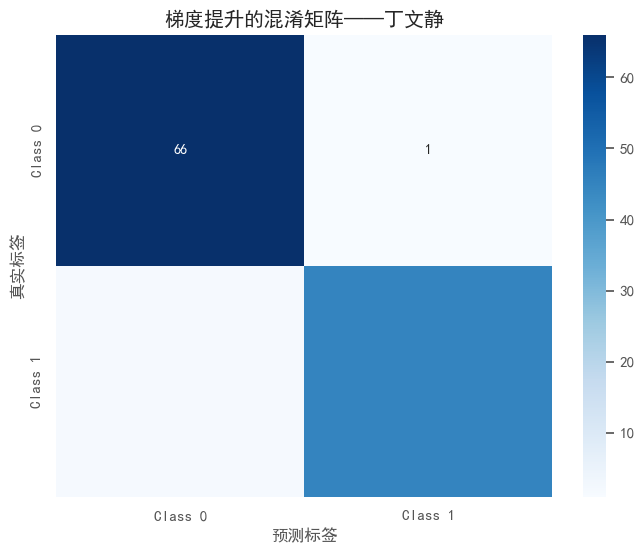

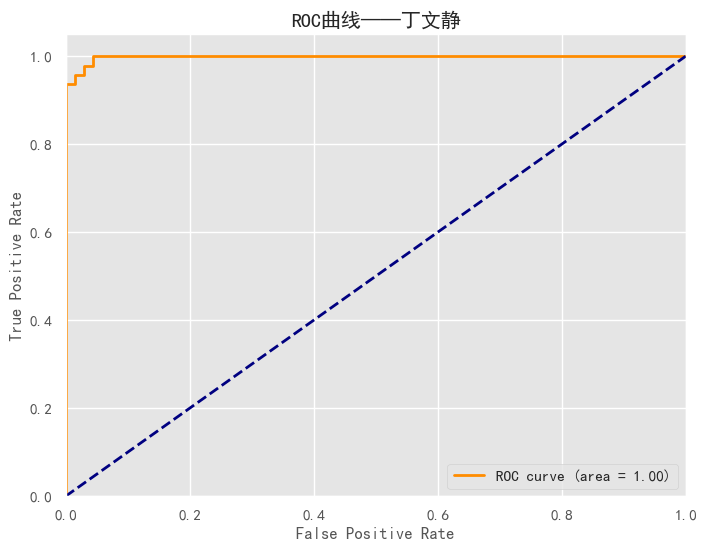

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_curve, auc

# 1梯度提升分类器的混淆矩阵数据
conf_matrix_gbc = np.array([[66, 1],
                             [2, 45]])

# 创建热图
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gbc, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

# 添加标题和标签
plt.title('梯度提升的混淆矩阵——丁文静')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.show()

#2.ROC曲线
# 首先预测测试集的概率
y_prob = gbc.predict_proba(X_test)[:, 1]

# 计算ROC曲线的召回率、假阳性率和阈值
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC曲线——丁文静')
plt.legend(loc="lower right")
plt.show()

执行以上可视化步骤提升了评估和可视化梯度提升分类器的性能：

混淆矩阵的可视化：

使用Seaborn库创建了一个混淆矩阵的热图，以直观展示模型的分类性能。
混淆矩阵显示了66个真实良性（Class 0）样本被正确预测，1个被错误预测为恶性（Class 1）；同时，45个真实恶性（Class 1）样本被正确预测，2个被错误预测为良性。
ROC曲线和AUC值的计算与可视化：

使用predict_proba()方法获取测试集上样本为正类（恶性）的概率。
通过roc_curve()函数计算了假阳性率（FPR）和真阳性率（TPR），以及相应的阈值。
利用auc()函数计算了ROC曲线下的面积（AUC），这是一个衡量模型分类性能的指标，AUC值越高，模型性能越好。
利用Matplotlib库绘制了ROC曲线，并添加了表示随机猜测的对角线（FPR=TPR）作为参考。
在图例中显示了AUC值，提供了模型性能的量化评估。
总结：梯度提升分类器在测试集上表现出较高的分类准确率，混淆矩阵显示了较低的误分类率。ROC曲线下的面积（AUC）提供 了模型整体分类能力的量化度量，从可视化结果来看，ROC曲线接近于左上角，表明模型具有较好的分类性能。这些可 视化结果有助于深入理解模型的性能，并为进一步的模型优化和应用提供依据。

我的思考： 在这段代码中，我们对GradientBoosting分类器进行了参数调优，并使用网格搜索(GridSearchCV)找到了最佳参数组合。 最终，我使用最佳参数重新构建了分类器，并评估了其在测试集上的性能，包括准确率、混淆矩阵和分类报告。 这有助于优化模型的性能并提高预测准确度。

关于梯度提升分类器 优点： 通过参数调优和性能评估，可以提高模型的准确率和泛化能力。 使用GridSearchCV进行参数调优可以自动化地尝试不同的参数组合，找到最佳的模型参数。 通过可视化比较不同模型的性能，可以帮助选择最适合数据集的模型。 缺点： 网格搜索（GridSearchCV）可能会消耗较多的计算资源和时间，特别是在参数空间较大时。 过度调优参数可能导致过拟合，降低模型的泛化能力。

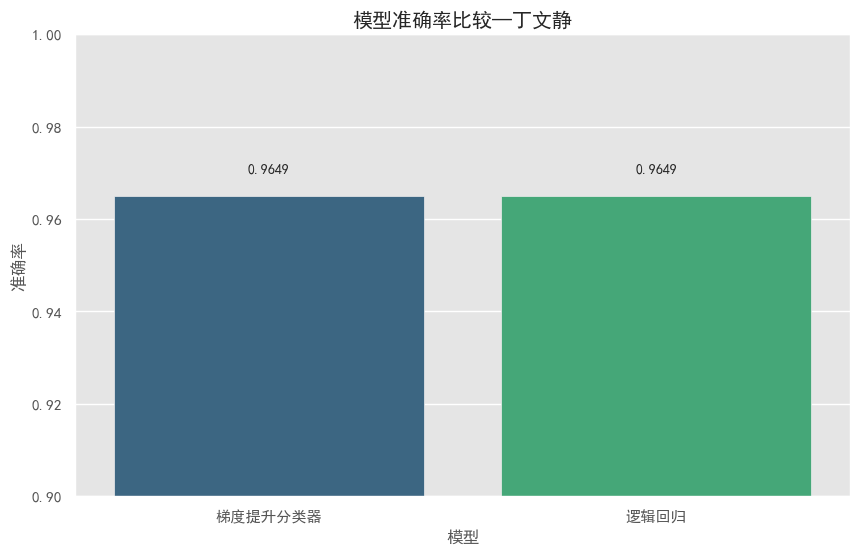

In [95]:
# 可视化比较梯度提升分类器和逻辑回归的准确率
import matplotlib.pyplot as plt
import seaborn as sns

models = ['梯度提升分类器', '逻辑回归']
accuracies = [gbc_acc, log_reg_acc]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.ylim(0.9, 1.0)  # 设置y轴范围
plt.title('模型准确率比较—丁文静')
plt.ylabel('准确率')
plt.xlabel('模型')

# 在条形图上显示具体数值
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, str(round(v, 4)), ha='center')

plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
# 添加标题和标签
plt.title('模型准确率比较—丁文静')
plt.ylabel('准确率')
plt.xlabel('模型')

plt.show()

# 3.KNN(马菁远)

1.from sklearn.neighbors import KNeighborsClassifier: 这行代码导入了scikit-learn库中的K最近邻分类器（KNeighborsClassifier）类，该类实现了KNN算法用于分类任务。
2.knn = KNeighborsClassifier(): 这行代码创建了一个K最近邻分类器的实例对象，并将其赋值给变量knn。在这里，使用了默认的参数配置，即K值为5。
3.knn.fit(X_train, y_train): 这行代码使用训练数据集X_train和对应的标签y_train来训练K最近邻分类器模型。X_train是特征数据，包含了训练样本的特征信息，y_train是目标标签，包含了对应的类别信息。

In [96]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()


在这段代码中，knn 是一个 k 近邻分类器（K Nearest Neighbors Classifier），通过 fit 方法在训练集上进行了训练，然后通过 predict 方法对测试集 X_test 进行预测，将预测结果存储在 y_pred 中。 具体分析如下：
1.预测结果： 变量 y_pred 中存储了对测试集 X_test 的预测结果。预测结果通常是对应每个测试样本的类别标签（或者在回归任务中是预测的数值），表示模型根据输入特征预测的输出值。
2.解释预测结果： 可以进一步分析 y_pred 中的具体数值或类别标签，以理解模型对测试集的预测结果。例如，对于分类任务，可以查看不同类别的预测比例或统计指标，以评估模型的分类性能；对于回归任务，可以计算预测值与真实值之间的误差或相关性等指标。
3.评估模型性能： 可以将预测结果 y_pred 与测试集的真实标签进行比较，从而评估模型在未见过的数据上的性能。可以使用各种评估指标如准确率、精确率、召回率、F1 分数等来评估分类模型的性能，或者使用均方误差（MSE）、平均绝对误差（MAE）、R 平方值等指标来评估回归模型的性能。

In [97]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0], dtype=int64)

这段代码使用了Scikit-learn库中的几个函数来评估K最近邻（KNN）分类器的性能，并打印出了准确率、混淆矩阵和分类报告。下面对这些结果进行分析：

1.accuracy_score(y_train, knn.predict(X_train)): 这一行计算了KNN模型在训练集上的准确率。这个准确率衡量了模型在已经见过的数据上的预测性能。然而，这个准确率并不一定代表模型在未见过的数据上的泛化能力。
2.knn_acc = accuracy_score(y_test, knn.predict(X_test)): 这行代码计算了KNN模型在测试集上的准确率，并将结果保存在变量knn_acc中。测试集上的准确率是评估模型泛化能力的重要指标，因为它反映了模型对未知数据的预测能力。
3.y_pred = knn.predict(X_test): 这行代码使用KNN模型对测试集数据进行预测，并将结果保存在变量y_pred中。
4.confusion_matrix(y_test, y_pred): 这行代码计算了测试集上的混淆矩阵，混淆矩阵是一种用于评估分类模型性能的表格，可以显示模型的预测结果与真实标签之间的关系。
5.classification_report(y_test, y_pred): 这行代码生成了一个包含了准确率、召回率、F1值等指标的分类报告。分类报告提供了更详细的性能评估信息，包括每个类别的精确度、召回率和F1值等指标。

通过这些输出结果，可以更全面地评估KNN模型在乳腺癌分类任务上的性能表现，包括训练集和测试集上的准确率、混淆矩阵以及分类报告中的更详细的性能指标。

In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, knn.predict(X_train)))
knn_acc = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.967032967032967
0.956140350877193
[[66  1]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



这段代码包含两个主要部分：特征可视化和分类结果可视化。
1.特征可视化：
使用pairplot函数绘制特征之间的成对关系图。
设置hue='diagnosis'以根据诊断结果对数据进行着色，使得良性和恶性样本在图中有不同的颜色。
选择了四个特征进行可视化，分别是半径均值（radiusmean）、纹理均值（texturemean）、面积均值（areamean）、平滑度均值（smoothnessmean）。
图表标题为“Pairplot of Breast Cancer Dataset Features”。
2.分类结果可视化：
使用热图（heatmap）绘制混淆矩阵。
混淆矩阵是一个表格，行表示实际类别，列表示预测类别，表格中的值表示相应类别的样本数量。
设置annot=True以在热图中显示数值，cmap='Blues'以使用蓝色调色板来表示不同数值大小。
设置fmt='g'以使用常规格式显示数字。
x轴和y轴分别标记为“Predicted”和“Actual”。
图表标题为“Confusion Matrix”。

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.98      0.91      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<Figure size 1200x800 with 0 Axes>

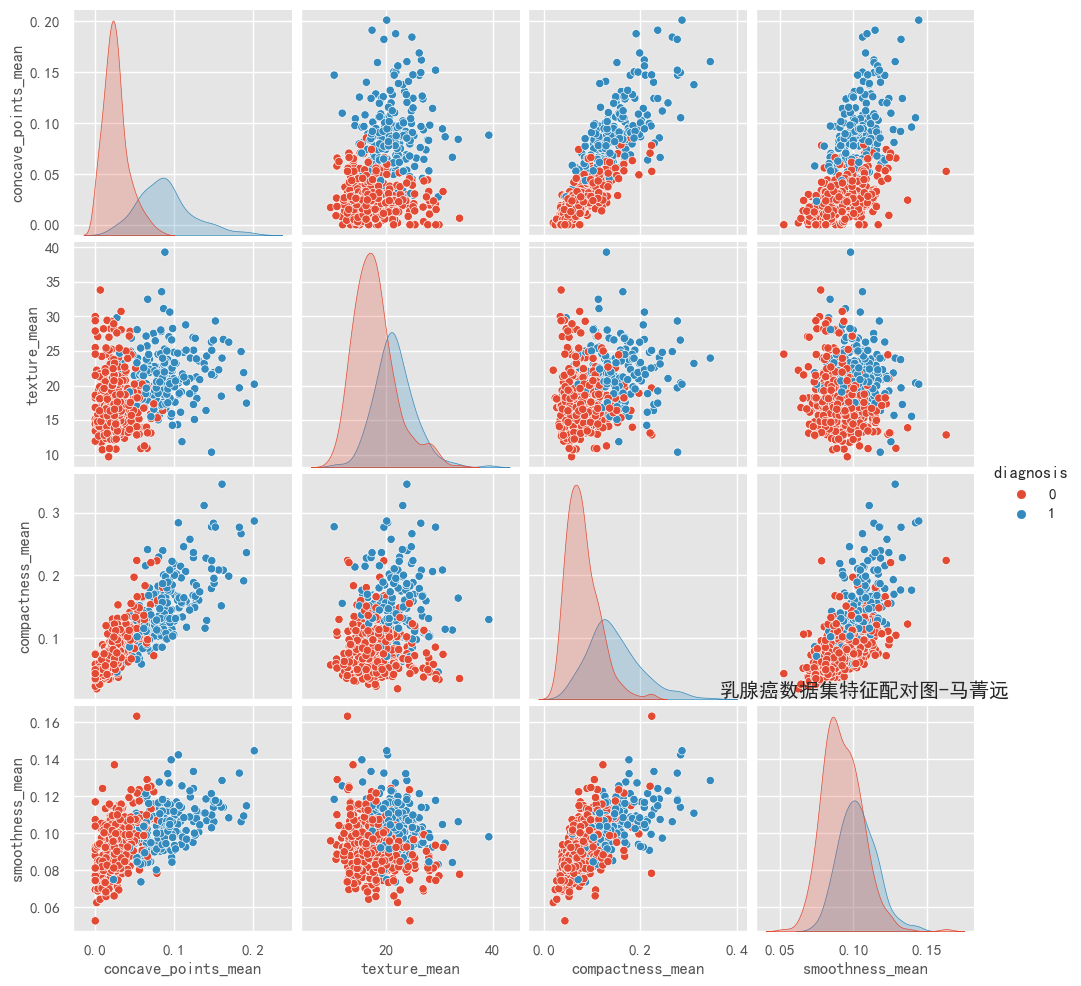

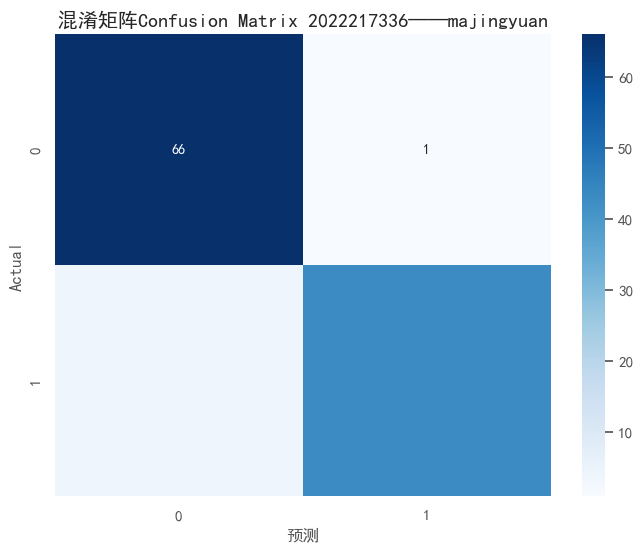

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 可视化分类报告
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# 特征可视化
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='diagnosis', vars=['concave_points_mean', 'texture_mean', 'compactness_mean', 'smoothness_mean'])
plt.title('乳腺癌数据集特征配对图-马菁远')
plt.show()

# 分类结果可视化
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('预测')
plt.ylabel('Actual')
plt.title('混淆矩阵Confusion Matrix 2022217336——majingyuan')
plt.show()


# 4.决策树(马菁远)

1.首先导入了 DecisionTreeClassifier 和 GridSearchCV 模块，分别用于创建决策树分类器和进行超参数调优。 
2.创建了一个决策树分类器对象 . tc。 
3.定义了一个参数字典 parameters，其中包含了待调优的参数范围，包括决策树的划分准则（criterion）、最大深度（maxdepth）、叶子节点最小样本数（minsamplesleaf）、内部节点再划分所需最小样本数（minsamples_split）以及划分策略（splitter）。 
4.创建了一个 GridSearchCV 对象 grid_search_dt，传入了决策树分类器对象 dtc、参数字典 parameters、交叉验证折数 cv=5、并行运算的 CPU 核数 -1、以及详细输出模式 verbose=1。 
5.调用 fit 方法，将训练集数据 X_train 和对应的标签 y_train 传入，以执行网格搜索交叉验证，并找到最佳的模型的泛化能力。

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()

parameters = {
    'criterion':['gini','entropy'],
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best','random']
}

grid_search_dt = GridSearchCV(dtc, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [102]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 21,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'splitter': 'random'}

In [103]:
grid_search_dt.best_score_

0.9604395604395604

In [104]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4, min_samples_split=5, splitter = 'random')

In [105]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_leaf=4,
                       min_samples_split=5, splitter='random')

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report: 导入Scikit-learn库中的评估指标函数，包括准确率（accuracy_score）、混淆矩阵（confusion_matrix）和分类报告（classification_report）。

print(accuracy_score(y_train, dtc.predict(X_train))): 输出训练集上的模型准确率。这里使用了accuracy_score函数，通过比较模型对训练集样本的预测结果与真实标签，计算并输出准确率。

dtc_acc = accuracy_score(y_test, dtc.predict(X_test)): 计算测试集上的模型准确率，并将结果保存在变量dtc_acc中。同样使用accuracy_score函数，比较模型对测试集样本的预测结果与真实标签，计算并保存准确率。

y_pred = dtc.predict(X_test): 对测试集进行预测，将预测结果保存在变量y_pred中。这里使用了决策树分类器（dtc）对测试集特征（X_test）进行预测，得到预测的分类标签。

print(confusion_matrix(y_test, y_pred)): 输出测试集上的混淆矩阵。混淆矩阵是一个用于评估分类模型性能的表格，展示了模型预测结果与真实标签之间的关系。

print(classification_report(y_test, y_pred)): 输出测试集上的分类报告。分类报告提供了模型在每个类别上的精确度、召回率、F1值等指标，以及加权平均指标，用于全面评估模型在各个类别上的性能。

In [106]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, dtc.predict(X_train)))
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9714285714285714
0.9473684210526315
[[62  5]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        67
           1       0.90      0.98      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



# 5.SVM(高敏)

以下主要进行支持向量机（SVM）模型的超参数调优，并使用网格搜索（GridSearchCV）找到最佳的超参数组合，然后重新训练SVM模型，并评估其性能

In [107]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


使用 GridSearchCV 来优化 SVC 的参数通常涉及以下步骤：

定义一个参数网格，其中包含你想要探索的所有参数及其可能的取值范。

创建一个 SVC实例，并将其递给GridSearhCV` 构造函数。同时，指定参数网格和评数等。

运行 GridSerchCV 对象 fit` 方法，它将在训练集上进行多次交叉验证，以评估每个参数合的性能。

一旦搜索完，你可以通过 GridarchV 对象的 bes_score_ 属性获取高得分，以及 bestparams_ 属性获取对应最佳参数组合。

最后，使用最佳参组合C 个新的 SVC 实例，并用它在整个数据集上进行训练。

进行超参数调优 步骤如下（分别用什么方法实现呢）： 首先要做的的是初始化SVC模型 接着定义超参数gamma和C的范围 找到最佳超参数组合 最后在训练集上训练

In [108]:
svc= SVC(probability=True)
#初始化SVC模型，并设定参数probability=True，以支持概率估计。
parameters = {
    'gamma': [0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1,10, 15,20]
}
#定义要调优的超参数范围，包括gamma和C。
grid_search = GridSearchCV(svc, parameters)
#使用GridSearchCV进行网格搜索，通过交叉验证找到最佳的超参数组合。
grid_search.fit(X_train, y_train)
#调用fit()方法在训练集上进行训练，寻找最佳参数组合。

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

最佳参数评估 GridSearchCV是一个用于模型超参数优化的交叉验证工具。它通过遍历所有参数组合，对每一组参数进行交叉验证，并计算每个模型的平均分数。

grid_search.best_params_是一个属性，用于获取在网格搜索过程中得到的最佳参数组合。在进行网格搜索时，会定义一个参数网格，然后通过交叉验证来评估每个参数组合的性能，最终找到最佳参数组合。通过访问grid_search.best_params_属性，就可以获取到这个最佳参数组合的具体数值。这个属性通常会返回一个字典，其中键是参数名，值是最佳参数值。这样就可以将这些最佳参数值用于构建最终的模型。

In [109]:
grid_search.best_params_
#获取网格搜索找到的最佳参数组合，分别是C=15和gamma=0.01。

{'C': 15, 'gamma': 0.01}

获取网格搜索找到的最佳参数组合，分别是C=15和gamma=0.01。

grid_search.best_score_是一个属性，用于获取在网格搜索过程中得到的最佳模型的评分。在进行网格搜索时，会定义一个参数网格，然后通过交叉验证来评估每个参数组合的性能，最终找到最佳参数组合和对应的最佳模型。通过访问grid_search.best_score_属性，就可以获取到这个最佳模型的评分。这个评分通常是根据我们在交叉验证中选择的评价指标来计算的，比如准确率、均方误差等。这个属性的值越高（或者越低，具体取决于评价指标的定义），表示模型的性能越好。通过这个属性，我们可以了解到在网格搜索中找到的最佳模型的性能表现。

In [110]:
#获取最佳分数
grid_search.best_score_
#best_score_是GridSearchCV对象的一个属性，它存储了在所有参数组合中得到的最好分数。一旦GridSearchCV完成搜索，就可以通过这个属性获取到最佳分数。
#这个属性能使我们知道在参数搜索过程中得到的最好性能指标。它可以用来评估模型的最佳性能，或者作为后续模型比较的基准。

0.9802197802197803


使用最佳参数重新初始化SVC模型，并在整个训练集上进行训练。 参数分别是：

C：惩罚参数，控制间隔的大小和边界的平滑程度。C值越大，模型对误分类的惩罚越严重。 gamma：核函数的系数，影响模型的复杂度和拟合能力。gamma值越大，模型越复杂，可能导致过拟合。 probability：是否启用概率估计。设置为True时，模型会输出类别的概将段代码中，SM分类器被实例化为svc对，并设置了C=15、gamma=0.01和probability=True这三个参数。这意味着创建的SVM分类器将使用C=15和gamma=0.01来构建模型，同时还会输出类别概率值。 就

接下来，可以使用这个svc对象来拟合数据并进行预测，从而实现对分类任务的处理。

In [111]:
svc = SVC(C=15, gamma=0.01, probability=True)
svc.fit(X_train, y_train)

SVC(C=15, gamma=0.01, probability=True)

使用之前创建的SVM分类器（svc）对测试数据集（X_test）进行预测，并将预测结果保存在y_pred中。

具体地说，predict()是SVM分类器对象的方法，用于对输入数据进行预测。在这里，X_test是测试数据集，包含了模型未见过的数据样本。通过调用svc.predict(X_test)，SVM分类器会对测试数据集进行预测，并将预测结果返回给y_pre d。y_pred是一个包含了模型对测试数据集每个样本的预测类别的数组段代码，我们可以使用训练好的SVM分类器对新的数据进行分类预测，并进一步评估模型的性能和准确度。

In [112]:
y_pred = svc.predict(X_test)

In [113]:
y_pred
#进行预测，得到测试集上的预测结果y_pred。

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0], dtype=int64)

性能评估

In [114]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, svc.predict(X_train)))
#使用accuracy_score()计算训练集上的准确率。
svc_acc = accuracy_score(y_test, svc.predict(X_test))
#使用accuracy_score()计算测试集上的准确率，并将其存储在svc_acc中。
print(svc_acc)
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
#使用confusion_matrix()计算混淆矩阵，评估模型的性能。
print(classification_report(y_test, y_pred))
#使用classification_report()生成包括准确率、召回率、F1分数等指标的分类报告，评估模型的整体表现。

0.989010989010989
0.9824561403508771
[[67  0]
 [ 2 45]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        47

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



导入用于模型评估的一些常用指标和函数，包括准确率（accuracy_score）、混淆矩阵（confusion_matrix）和分类报告（classification_report）。

具体如下函：

accuracy_score：准确率是分类模型评估中最常用的指标之一，用于衡量模型预测的正确率。accuracy_score函数接受实际标签和预测标签作为输入，计算并返回模型的准确率。 confusion_matrix：混淆矩阵是用于评估分类模型性能的矩阵，可以展示模型在不同类别上的预测情况。confusion_matrix函数接受实际标签和预测标签作为输入，返回一个混淆矩阵，可以用来分析模型的分类结果。 classification_report：分类报告提供了更详细的模型评估结果，包括精确率、召回率、F1值等指标。classification_report函数接受实际标签和预测标签作为输入，返回一个包含各项指标的报告。

混淆矩阵热图+ROC曲线

具体步骤如下： 导入需要的库和模块：

from sklearn.metrics import confusion_matrix, roc_curve, auc：从sklearn.metrics模块中导入混淆矩阵（confusion_matrix）、ROC曲线（roc_curve）和AUC（auc）等评估指标。 plt.rcParams['font.sans-serif'] = ['SimHei']：设置图表中的中文字体为黑体（SimH，防止汉字标题输出为方框的形况。i）。 计算混阵：

conf_matrix = confusion_matrix(y_test, y_pred)：利用模型预测结果（y_pred）和真实标签（y_test）计混淆矩阵（Confusion Matrix）是用于评估分类模型性能的一种表格，它对模型的预测结果和真实标签进行了汇总和比较，以便计算各种评估指标。的重要指标。 绘制混矩阵热图：

plt.figure(figsize=(8, 6))：创建一个大小为8x6的新图形。 sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')：利用Seaborn库绘制混淆矩阵的热图，其中参数annot=True表示在热图中显示数值，fmt='d'表示数值格式为整数，cmap='Blues'表示颜色映射为蓝色调。 plt.title('混淆矩阵-高敏')：设置图表标题为'混淆矩阵-高敏'。 plt.ylabel('Actual label')：设置y轴标签为'Actual label'，表示实际标签。 plt.xlabel('Predicted label')：设置x轴标签为'Predicted label'示预测标签。 显示图形：

plt.show()上绘我淆矩阵热图。 综合来看，以上代码通过计算混矩阵，并利用Seaborn库绘制了混淆矩阵的热图，展示了模型在测试集上的预测结果。通过观察混淆矩阵热图，可以直观地了解模型的分类性能，进一步评估模型的准确性和可靠性。

绘制ROC曲线具体步骤如下： y_pred_prob = svc.predict_proba(X_test)[:, 1]：获取模型对测试集数据的预测概率，这里选择获取正类别的预测概率。 fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)：利用sklearn中的roc_curve函数计算ROC曲线的值，其中fpr表示假正率（误报率），tpr表示真正率（查准率），thresholds表示分类阈值。 roc_auc = auc(fpr, tpr)：计算ROC曲线下的面积（AUC，Area Under the Curve），AUC值用于衡量分类模型的性能，数值越大表示模型性能越好。 绘制ROC曲线： plt.figure()：创建一个新的图形窗口。 plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)：绘制ROC曲线，横轴为FPR，纵轴为TPR，使用深橙色线条，显示AUC值在图例中。 plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')：绘制对角线，代表随机分类的ROC曲线。 plt.xlim([0.0, 1.0])：设置x轴范围。 plt.ylim([0.0, 1.05])：设置y轴范围。 plt.xlabel('False Positive Rate')：设置x轴标签为假正率。 plt.ylabel('True Positive Rate')：设置y轴标签为真正率。 plt.title('接收者操作特性曲线-高敏')：设置图表标题为'接收者操作特性曲线-高敏'。 plt.legend(loc="lower right")：显示图例，位置在右下角。 plt.show()：显示绘制好的ROC曲线图形。 综上，通过计算模型的预测概率并绘制ROC曲线，可以评估支持向量机模型在测试集上的性能表现，其中AUC值和ROC曲线形状可以帮助我们判断模型的分类能力和区分能力。 ROC曲线是评估二分类模型性能的重要工具之一。

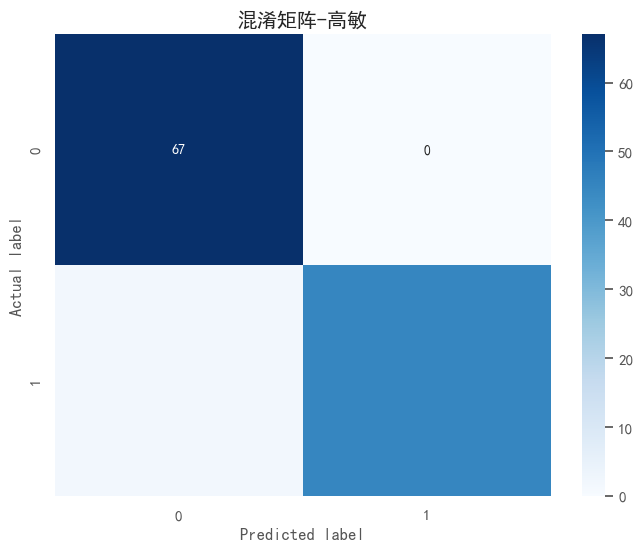

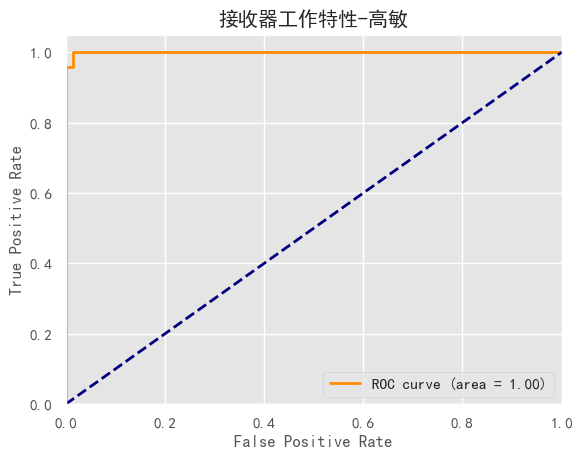

In [115]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 混淆矩阵热图
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('混淆矩阵-高敏')
#混淆矩阵
plt.ylabel('Actual label')
#实际标签
plt.xlabel('Predicted label')
#预测标签
plt.show()

# ROC 曲线
y_pred_prob = svc.predict_proba(X_test)[:, 1]  # 获取模型输出的概率
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)  # 计算ROC曲线的值
roc_auc = auc(fpr, tpr)  # 计算AUC

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#深橙色
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#海蓝色
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
#误报率，指在所有实际为负类（非正例）的样本中，被错误地分类为正类（正例）的比例。
plt.ylabel('True Positive Rate')
#查准率，是指在所有实际为正类的样本中，被正确地分类为正类的比例。
plt.title('接收器工作特性-高敏')
#接收者操作特性曲线，是一个用于评估分类模型性能的图形工具。
#它将查准率（TPR）作为误报率（FPR）的函数绘制出来。ROC曲线下的面积（AUC，Area Under the Curve）是一个常用的性能度量，AUC值越高，模型的分类性能越好。
plt.legend(loc="lower right")
#在ROC曲线的上下文中，"lower right"（右下方）通常指的是FPR较高的区域，即随着分类阈值的降低，更多的样本被预测为正类，导致假正例的数量增加，FPR上升。在ROC曲线上，这通常意味着曲线向右下方倾斜。
plt.show()

绘制良恶性肿瘤散点图

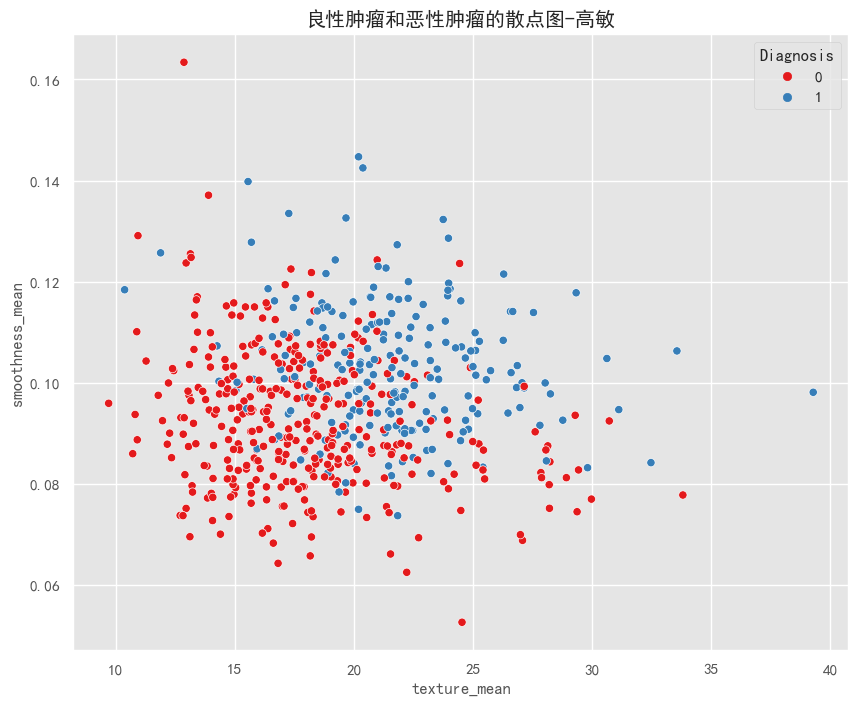

In [115]:
# 选择两个特征用于展示，这里以第一和第二个特征为例
feature1 = df.columns[1]  # 第一个特征
feature2 = df.columns[2]  # 第二个特征

# 使用seaborn的scatterplot函数来创建点阵图
plt.figure(figsize=(10, 8))  # 设置图形的大小
sns.scatterplot(data=df, x=feature1, y=feature2, hue='diagnosis', palette='Set1')

# 添加标题和轴标签
plt.title('良性肿瘤和恶性肿瘤的散点图-高敏')
#良恶性肿瘤散点图
plt.xlabel(feature1)
plt.ylabel(feature2)

# 显示图例 诊断
plt.legend(title='Diagnosis')

# 显示图形
plt.show()

# 6.朴素贝叶斯(高敏)

创建模型 训练模型

In [116]:
from sklearn.naive_bayes import GaussianNB
# 创建朴素贝叶斯模型
GaussianNB = GaussianNB()

# 使用训练集训练模型
model.fit(X_train, y_train)

GaussianNB()

In [117]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0], dtype=int64)

导入用于模型评估的一些常用指标和函数，包括准确率（accuracy_score）、混淆矩阵（confusion_matrix）和分类报告（classification_report）。 具体介绍如下： accuracy_score：准确率是分类模型评估中最常用的指标之一，用于衡量模型预测的正确率。accuracy_score函数接受实际标签和预测标签作为输入，计算并返回模型的准确率。 confusion_matrix：混淆矩阵是用于评估分类模型性能的矩阵，可以展示模型在不同类别上的预测情况。confusion_matrix函数接受实际标签和预测标签作为输入，返回一个混淆矩阵，可以用来分析模型的分类结果。 classification_report：分类报告提供了更详细的模型评估结果，包括精确率、召回率、F1值等指标。classification_report函数接受实际标签和预测标签作为输入，返回一个包含各项指标的报告。

In [118]:
print(accuracy_score(y_train, model.predict(X_train)))
#使用accuracy_score()计算训练集上的准确率。
GaussianNB_accuracy = accuracy_score(y_test, model.predict(X_test))
#将准确率存储在accuracy中。
print(GaussianNB_accuracy)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
#使用confusion_matrix()计算混淆矩阵，评估模型的性能。
print(classification_report(y_test, y_pred))
#使用classification_report()生成包括准确率、召回率、F1分数等指标的分类报告，评估模型的整体表现。

0.9406593406593406
0.8947368421052632
[[61  6]
 [ 6 41]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        67
           1       0.87      0.87      0.87        47

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



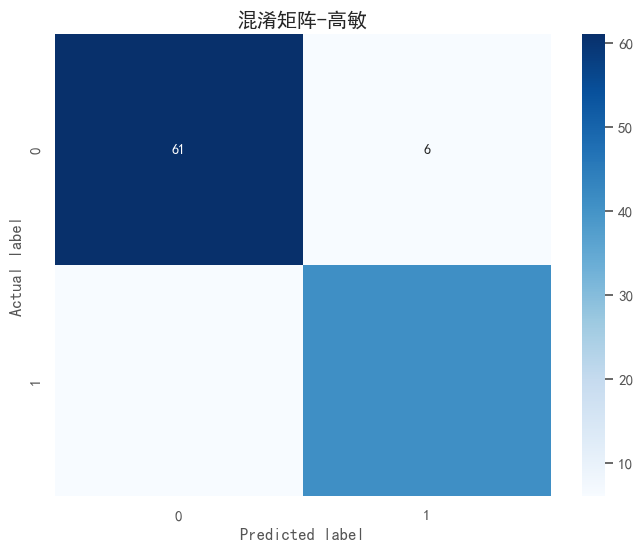

In [119]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体为黑体
# 混淆矩阵热图
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('混淆矩阵-高敏')
#Confusion Matrix
plt.ylabel('Actual label')
#实际标签
plt.xlabel('Predicted label')
#预测标签
plt.show()

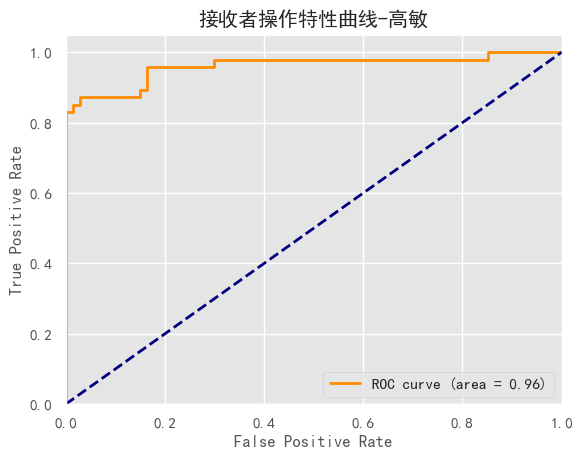

In [39]:
y_pred_prob = model.predict_proba(X_test)[:, 1]  # 获取模型输出的概率
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)  # 计算ROC曲线的值
roc_auc = auc(fpr, tpr)  # 计算AUC

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
#深橙色
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#海蓝色
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
#误报率，指在所有实际为负类（非正例）的样本中，被错误地分类为正类（正例）的比例。
plt.ylabel('True Positive Rate')
#查准率，是指在所有实际为正类的样本中，被正确地分类为正类的比例。
plt.title('接收者操作特性曲线-高敏')
#Receiver Operating Characteristic，是一个用于评估分类模型性能的图形工具。
#它将查准率（TPR）作为误报率（FPR）的函数绘制出来。ROC曲线下的面积（AUC，Area Under the Curve）是一个常用的性能度量，AUC值越高，模型的分类性能越好。
plt.legend(loc="lower right")
#在ROC曲线的上下文中，"lower right"（右下方）通常指的是FPR较高的区域，即随着分类阈值的降低，更多的样本被预测为正类，导致假正例的数量增加，FPR上升。在ROC曲线上，这通常意味着曲线向右下方倾斜。
plt.show()

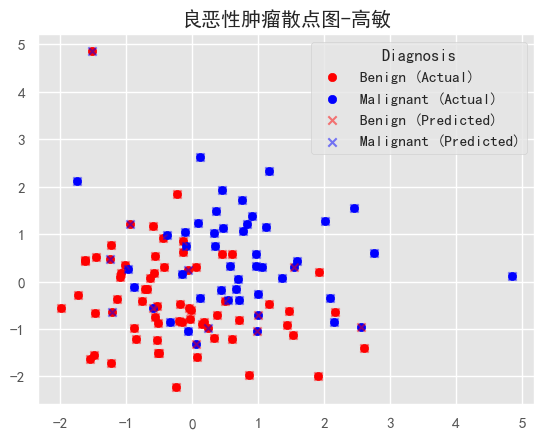

In [40]:
# 我们已经有以下变量:y_test, y_pred, X_test
# 提取测试良性（0）和恶性（1）的样本
benign_samples = X_test[y_test == 0]
malignant_samples = X_test[y_test == 1]

# 提取预测为良性（0）和恶性（1）的样本
benign_predictions = X_test[y_pred == 0]
malignant_predictions = X_test[y_pred == 1]

# 创建一个图形和一个子图
fig, ax = plt.subplots()
# 绘制真实的良性样本（红色圆圈）
ax.scatter(benign_samples[:, 0], benign_samples[:, 1], c='red', marker='o', label='Benign (Actual)')
# 绘制真实的恶性样本（蓝色圆圈）
ax.scatter(malignant_samples[:, 0], malignant_samples[:, 1], c='blue', marker='o', label='Malignant (Actual)')
# 绘制预测的良性样本（红色叉叉）
ax.scatter(benign_predictions[:, 0], benign_predictions[:, 1], c='red', marker='x', alpha=0.5, label='Benign (Predicted)')
# 绘制预测的恶性样本（蓝色叉叉）
ax.scatter(malignant_predictions[:, 0], malignant_predictions[:, 1], c='blue', marker='x', alpha=0.5, label='Malignant (Predicted)')

# 设置图例和标题
ax.legend(title='Diagnosis')
ax.set_title('良恶性肿瘤散点图-高敏')

# 显示图形
plt.show()

# 7.随机森林(张琪)

使用随机森林分类器对数据输出了训练集和测试集上的准确度，混淆矩阵和分类报告集进行训练，并对测试集进行预测 输出了训练集和测试集上的准确度，混淆矩阵和分类报告

编写想法：导入必要的库：导入 RandomForestClassifier、train_test_split 等模块。 数据预处理：对数据集进行特征选择和数据缩放处理。 构建随机森林分类器：设置分类器的参数，如 criterion、max_depth、max_features、n_estimators 等。 训练模型：使用训练集对随机森林分类器进行训练。 模型评估：计算训练集和测试集上的准确度，并输出混淆矩阵和分类报告

In [120]:
#使用随机森林分类器对训练集进行拟合
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 10, max_features = 0.5, min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=0.5,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [121]:
y_pred = rand_clf.predict(X_test)

使用 X_train 和 y_train 对训练集进行拟合（训练）。 使用训练好的模型进行对测试集 X_test 的预测，预测结果存储在 y_pred 中。

In [122]:
#输出测试集的准确度、混淆矩阵和分类报告
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, rand_clf.predict(X_train)))
rand_clf_acc = accuracy_score(y_test, rand_clf.predict(X_test))
print(rand_clf_acc)
y_pred = rand_clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9978021978021978
0.9824561403508771
[[66  1]
 [ 1 46]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



随机森林在解决该分类问题时的优点：通常具有较高的准确度和鲁棒性。 能够处理大量特征和大型数据集，对异常值和噪声相对稳健. 缺点可能包括：对于某些情况下可能出现过拟合，需要调参来避免。 随机森林模型的训练时间可能会较长.

随机森林模型在该分类问题上表现良好，准确度较高，是一个有效的分类算法选择。

confusion_mat = confusion_matrix(y_test, y_pred):计算了预测标签和真实标签之间的混淆矩阵。y_test 是测试数据中的真实标签，而 y_pred 是模型对测试数据的预测结果。 plt.figure(figsize=(8, 6)): 这一行设置了图形的大小为宽8英寸，高6英寸。 sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues'): 这里使用 seaborn 库的 heatmap 函数创建了热图。confusion_mat 是混淆矩阵，annot=True 表示在热图中显示数值，fmt='d' 表示数字格式为整数，cmap='Blues' 指定了颜色映射为蓝色调色板。 plt.xlabel('预测标签'): 设置 x 轴标签为“预测标签”。 plt.ylabel('真实标签'): 设置 y 轴标签为“真实标签”。 plt.title('混淆矩阵-张琪'): 设置图表标题为“混淆矩阵-张琪”。 plt.show(): 最后一行代码展示了创建的热图。 作用生成一个可视化的混淆矩阵热图，用于直观地展示模型在测试数据上的预测效果。

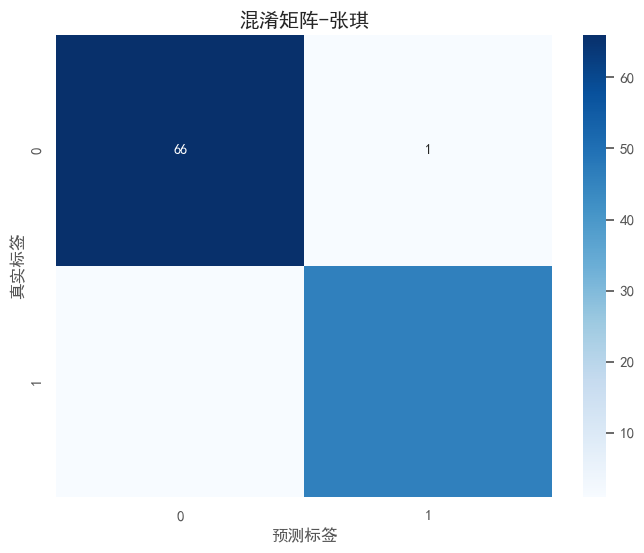

In [123]:
confusion_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵-张琪')
plt.show()

plt.rcParams['font.sans-serif'] = ['SimHei']: 这行代码设置了图表的中文字体为宋体（SimHei）。 plt.figure(figsize=(8, 6)): 这一行设置了图形的大小为8英寸宽，6英寸高。 plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm'): 使用 matplotlib 的 scatter 函数创建散点图。X_test[:, 0] 和 X_test[:, 1] 分别表示测试数据的两个特征，c=y_pred 表示根据模型的预测结果进行着色，cmap='coolwarm' 指定了颜色映射为冷暖色调色板。 plt.xlabel('特征1'): 设置 x 轴标签为“特征1”。 plt.ylabel('特征2'): 设置 y 轴标签为“特征2”。分别是'compactness_mean', 'concave_points_mean' plt.title('随机森林预测结果散点图-张琪'): 设置图表标题为“随机森林预测结果散点图-张琪”。 plt.show(): 最后一行代码展示了创建的散点图。 作用是生成一个散点图，用来展示模型对测试数据的预测结果，其中不同类别的点使用不同的颜色表示。

In [124]:
df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'texture_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

其中特征1和2可以换另外的特征来再次绘画散点图，每两个组合不一样散点图就不一样，有的特征分辨就不是很明显，而有的就有很明显的应该属性

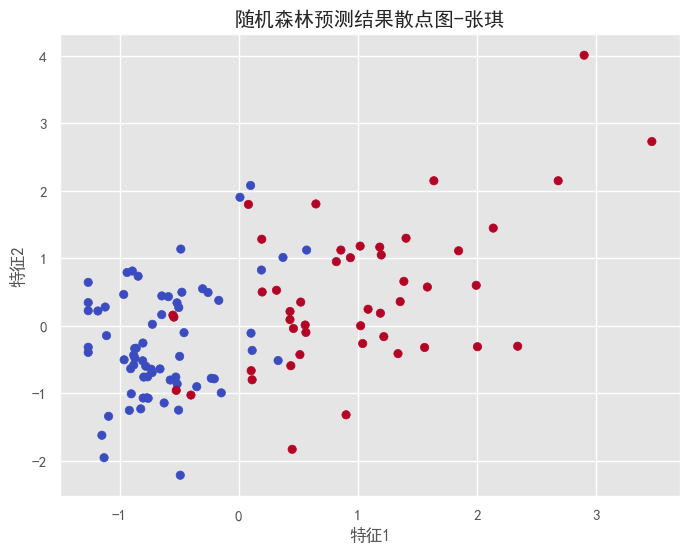

In [125]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:,3], X_test[:, 4], c=y_pred, cmap='coolwarm')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('随机森林预测结果散点图-张琪')
plt.show()

混淆矩阵和分类报告提供了模型在不同类别上的预测性能指标，包括精确度、召回率和 F1 值等 混淆矩阵中，有66个健康的病人被正确预测为健康，有1个健康的病人被错误预测为患病，有0个患病的病人被错误预测为健康，有47个患病的病人被正确预测为患病。） 训练集准确度和测试集准确度分别为0.99和0.99，表明模型在训练集和测试集上表现良好。

从 sklearn.ensemble 模块中导入 RandomForestClassifier，用于构建随机森林分类器。 导入 train_test_split 用于将数据集划分为训练集和测试集。 导入 accuracy_score、confusion_matrix 和 classification_report 用于评估模型性能。
创建了一个 RandomForestClassifier 对象 rand_clf。 设置了一些关键参数：criterion='entropy'（衡量分裂质量的标准为熵）、max_depth=10（树的最大深度为10）、max_features=0.5（每次分裂考虑的特征比例为50%）、min_samples_leaf=2（叶节点的最小样本数为2）、min_samples_split=3（内部节点再划分所需的最小样本数为3）、n_estimators=130（森林中树的数量为130）。

# 8.Multi-layer Perceptron（多层感知器）(张琪)

编写想法： 选择合适的网络结构：在这里选择了两个隐藏层，每层分别有100和50个神经元。这个选择是基于问题的复杂性、数据的维度和计算资源的考虑。通常，更复杂的任务可能需要更多的隐藏层或更大的隐藏层。然而，增加网络的复杂性也可能导致过拟合，所以也需要考虑。 激活数：选择了ReLU（Rectified Linear Unit）作为激活函数。ReLU是一个常用的激活函数，因为它在训练时计算效率高，并且有助于缓解梯度消失问题。 迭代次数：max_iter参数设置为1000，这意味着算法最多会进行1000次迭代来寻找最优解。设置合适的迭代次数是很重要的，因为如果迭代次数太少，算法可能找不到好的解；如果迭代次数太多，则可能浪费计算资源。 随机状态：设置random_state=42是为了确保每次运行代码时都能得到相同的结果，这有助于在比较不同模型或调整参数时保持一致性。 训练和预测：使用训练数据X_train和标签y_train来训练模型，然后使用测试数据X_test进行预测。 评估模型：使用混淆矩阵和分类报告来评估模型在测试集上的性能。模型在测试集上的性能。试集上的准确率。

In [126]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 创建MLP分类器对象，这里设置了一些参数，您也可以根据需要调整
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', max_iter=1000, random_state=42)

# 使用训练集训练模型
mlp.fit(X_train, y_train)

# 预测测试集
prediction_mlp = mlp.predict(X_test)

# 输出混淆矩阵和分类报告
conf_matrix = confusion_matrix(y_test, prediction_mlp)
class_report = classification_report(y_test, prediction_mlp)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

accuracy_mlp = accuracy_score(y_test, prediction_mlp)
print("Test Accuracy (MLP):", accuracy_mlp)

Confusion Matrix:
[[66  1]
 [ 1 46]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

Test Accuracy (MLP): 0.9824561403508771


混淆矩阵中，有66个健康的病人被正确预测为健康，有1个健康的病人被错误预测为患病，有1个患病的病人被错误预测为健康，有46个患病的病人被正确预测为患病。
最后得到的准确率为0.98，模型在该MLP分类问题上表现良好，准确度较高，是一个有效的分类算法选择。

代码解析：MLPClassifier: 从sklearn.neural_network模块导入，用于实现多层感知机（MLP）分类器。
classification_report 和 confusion_matrix: 从sklearn.metrics模块导入，用于评估分类模型的性能。
hidden_layer_sizes=(100, 50): 定义了网络结构，有两个隐藏层，第一层有100个神经元，第二层有50个神经元。
activation='relu': 使用ReLU（Rectified Linear Unit）作为激活函数。
max_iter=1000: 定义了算法的最大迭代次数为1000。
random_state=42: 设置随机种子以确保结果的可重复性。
使用训练数据集X_train和对应的标签y_train来训练MLP分类器。
使用训练好的MLP分类器对测试数据集X_test进行预测，并将预测结果存储在prediction_mlp中。

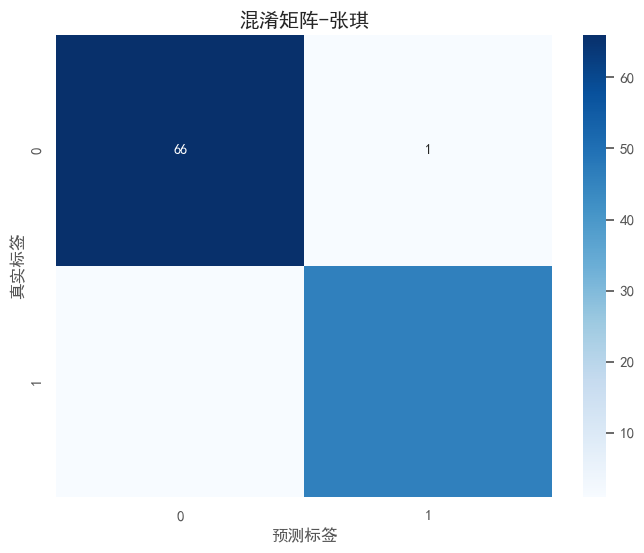

In [127]:
from sklearn.metrics import accuracy_score  
plt.figure(figsize=(8, 6))  
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')  
plt.title('混淆矩阵-张琪')  
plt.xlabel('预测标签')  
plt.ylabel('真实标签')  
plt.show()  

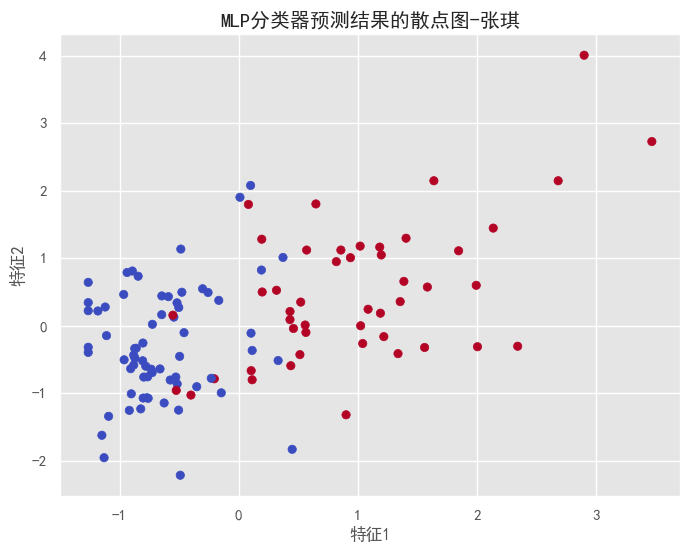

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 3], X_test[:, 4], c=prediction_mlp, cmap='coolwarm')
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('MLP分类器预测结果的散点图-张琪')
plt.show()

# 9.Linear Discriminant Analysis（线性判别分析）(张琪)

想法编写： 初始化分类器：首先，创建了一个LinearDiscriminantAnalysis（LDA）分类器对象lda。 定义参数网格：定义了一个参数网格param_grid_lda，包含了solver（求解器）和shrinkage（收缩参数）两个参数的可能值。 网格搜索与交叉验证：使用GridSearchCV和定义的参数网格对LDA分类器进行参数调优。通过5折交叉验证来评估不同参数组合的性能。 输出最佳参数：在网格搜索完成后，输出最佳参数组合。 使用最佳参数重新训练模型：通过grid_search_lda.best_estimator_获取使用最佳参数的LDA分类器，并用整个训练集重新训练。

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix

# 创建LDA分类器对象
lda = LinearDiscriminantAnalysis()

# 定义参数网格
param_grid_lda = {
    'solver': ['svd', 'lsqr', 'eigen'],
    'shrinkage': [None, 'auto']
}

# 使用网格搜索和交叉验证进行参数调整
grid_search_lda = GridSearchCV(lda, param_grid_lda, cv=5)
grid_search_lda.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters for LDA:", grid_search_lda.best_params_)

# 使用最佳参数重新训练模型  
best_lda = grid_search_lda.best_estimator_  
# 不需要再次训练，因为best_estimator_已经是训练好的模型  
  
# 预测测试集（使用最佳参数的LDA模型）  
prediction_lda = best_lda.predict(X_test)  # 修正：使用best_lda进行预测 

# 输出混淆矩阵和分类报告
conf_matrix_lda = confusion_matrix(y_test, prediction_lda)
class_report_lda = classification_report(y_test, prediction_lda)

print("Confusion Matrix (LDA):")
print(conf_matrix_lda)
print("\nClassification Report (LDA):")
print(class_report_lda)

# 输出准确率
accuracy_lda = accuracy_score(y_test, prediction_lda)
print("Test Accuracy (LDA with best parameters):", accuracy_lda)

Best parameters for LDA: {'shrinkage': 'auto', 'solver': 'lsqr'}
Confusion Matrix (LDA):
[[67  0]
 [ 5 42]]

Classification Report (LDA):
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        67
           1       1.00      0.89      0.94        47

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Test Accuracy (LDA with best parameters): 0.956140350877193


混淆矩阵中，有67个健康的病人被正确预测为健康，有0个健康的病人被错误预测为患病，有5个患病的病人被错误预测为健康，有42个患病的病人被正确预测为患病。 最后得到的准确率为0.95，模型在该LDA分类问题上表现良好，准确度较高，是一个有效的分类算法选择。

代码分析：
创建LDA分类器对象： 使用sklearn库中的LinearDiscriminantAnalysis类创建LDA分类器对象。
定义参数网格： 定义参数网格param_grid_lda，包括solver和shrinkage两个参数。 solver参数指定求解SVD或特征值分解的方法，取值有'svd'、'lsqr'和'eigen'。 shrinkage参数指定正则化类型，取值有None和'auto'。
使用训练集训练模型： 将训练集X_train和y_train传入LDA分类器对象lda的fit方法中，对模型进行训练。
使用网格搜索和交叉验证进行参数调整： 使用GridSearchCV函数对lda模型进行网格搜索和交叉验证，来寻找最佳参数组合。 GridSearchCV函数的参数包括模型、参数网格、交叉验证折数等。 最后输出最佳参数best_params_。
使用最佳参数重新训练模型： 根据最佳参数best_params_，使用GridSearchCV函数返回的best_estimator_属性获取最佳模型best_lda。
预测测试集： 使用最佳参数的LDA模型best_lda对测试集X_test进行预测，得到预测结果prediction_lda。
输出混淆矩阵和分类报告： 使用sklearn库中的confusion_matrix和classification_report函数计算预测结果的混淆矩阵和分类报告。 混淆矩阵展示了真实标签与预测标签之间的对应关系。 分类报告展示了模型在每个类别上的准确率、召回率、F1-score等指标。
输出准确率： 使用sklearn库中的accuracy_score函数计算LDA模型在测试集上的准确率accuracy_lda，并输出结果。

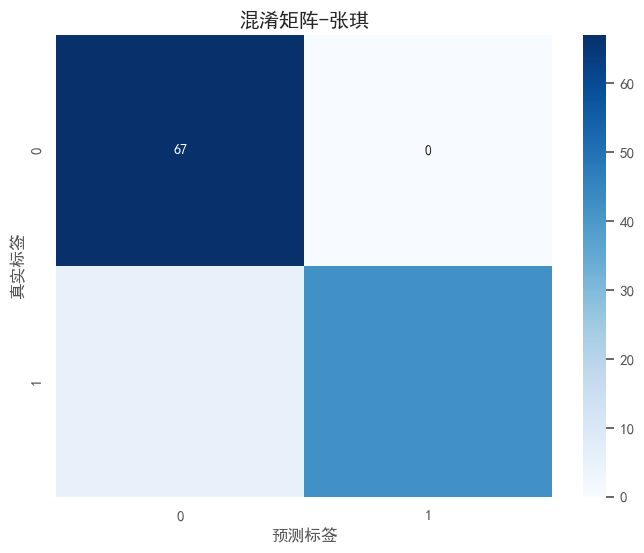

In [129]:
# Confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lda, annot=True, fmt='d', cmap='Blues')
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('混淆矩阵-张琪')
plt.show()

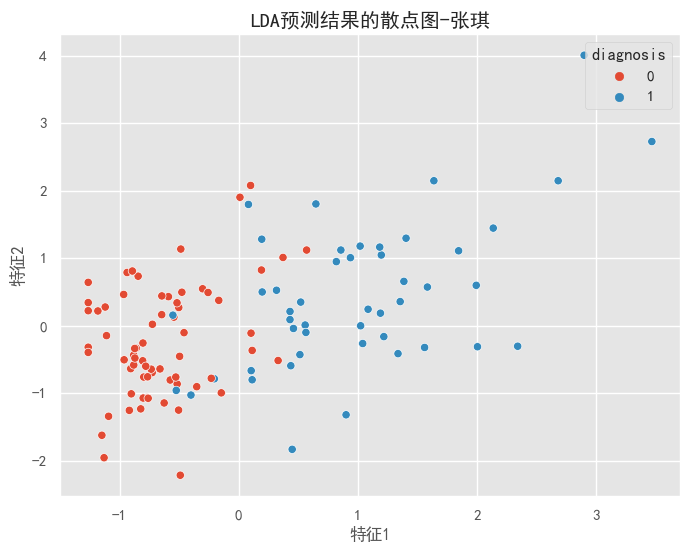

In [52]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 3], y=X_test[:, 4], hue=y_test)
plt.xlabel('特征1')
plt.ylabel('特征2')
plt.title('LDA预测结果的散点图-张琪')
plt.show()

确定三个分类器的预测概率：使用训练好的随机森林分类器（rand_clf）、多层感知器分类器（mlp）和线性判别分析分类器（best_lda）对测试集（X_test）进行预测，并获取每个分类器预测为正类的概率（y_pred_proba_rf、y_pred_proba_mlp和y_pred_proba_lda）。

计算各个分类器的假阳性率和真阳性率：使用sklearn中的roc_curve函数，通过传入真实标签（y_test）和预测概率，可以计算出每个分类器在不同阈值下的假阳性率（fpr）和真阳性率（tpr）。

计算AUC（Area Under Curve）：使用sklearn中的auc函数，通过传入假阳性率和真阳性率，可以计算出每个分类器的ROC曲线下的面积，即AUC。

绘制ROC曲线：使用matplotlib库，创建一个图形窗口，并绘制三个分类器的ROC曲线。虚线表示随机猜测分类器的ROC曲线。

最后，将绘制的ROC曲线展示出来，包括坐标轴、标题和图例等。

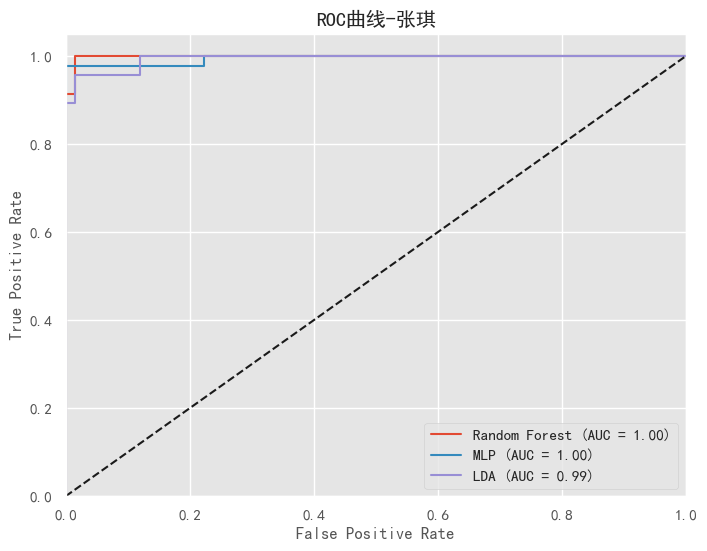

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 随机森林分类器的预测概率
y_pred_proba_rf = rand_clf.predict_proba(X_test)[:, 1]
# 多层感知器分类器的预测概率
y_pred_proba_mlp = mlp.predict_proba(X_test)[:, 1]
# 线性判别分析的预测概率
y_pred_proba_lda = best_lda.predict_proba(X_test)[:, 1]

# 计算各个分类器的假阳性率和真阳性率
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_pred_proba_mlp)
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_pred_proba_lda)

# 计算AUC
auc_rf = auc(fpr_rf, tpr_rf)
auc_mlp = auc(fpr_mlp, tpr_mlp)
auc_lda = auc(fpr_lda, tpr_lda)

# 绘制ROC曲线
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc_rf)
plt.plot(fpr_mlp, tpr_mlp, label='MLP (AUC = %0.2f)' % auc_mlp)
plt.plot(fpr_lda, tpr_lda, label='LDA (AUC = %0.2f)' % auc_lda)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC曲线-张琪')
plt.legend(loc="lower right")
plt.show()


首先，从ROC曲线图中可以看到，随机森林的曲线几乎完全覆盖了整个图的左上角，这意味着其在所有可能的分类阈值下都表现出很高的真阳性率和较低的假阳性率。它表明模型在识别正类（乳腺癌的恶性病例）时具有很高的准确性，同时又能避免将负类（良性病例）误判为正类。随机森林的高AUC值（1.00）也证实了这一点，AUC值越接近1，说明模型的性能越好。

多层感知机（MLP）的ROC曲线位于随机森林曲线之下，但也很接近左上角。这表明MLP的性能虽然不如随机森林，但也在一个相当高的水平。MLP的AUC值为0.99，仅略低于随机森林，说明它在处理分类任务时也具有很好的准确性。

线性判别分析（LDA）的ROC曲线则相对更靠近对角线，这意味着LDA在真阳性率和假阳性率之间的平衡不如前两者。尽管如此，LDA的AUC值仍然高达0.99，表明它在分类任务中也是一个相当不错的模型。

# 10.XGBClassifier(丁梓萱)

导入 XGBoost 库中的 XGBClassifier 类，这是一个用于构建梯度提升树模型的分类器。

创建了一个 XGBClassifier 对象，并设置了以下参数：

objective='binary:logistic'：指定目标函数为二分类逻辑回归。
learning_rate=0.01：设置学习率，即每次迭代时权重的缩减步长，较小的学习率需要更多的树（即较大的 n_estimators）来收敛。
max_depth=5：设置树的最大深度，控制树的复杂度，防止过拟合。
n_estimators=180：设置提升迭代的次数，即使用的

使用训练数据 X_train 和 y_train 来训练 XGBClassifier 模型。fit 方法是 Scikit-learn 风格的 API，用于模型的训练。树的数量。

In [130]:
from xgboost import XGBClassifier 

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.01, max_depth = 5, n_estimators = 180)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=180, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

导入了用于评估模型性能的指标：准确率（accuracy_score）、混淆矩阵（confusion_matrix）和分类报告（classification_report）

train_accuracy = accuracy_score(y_train, xgb.predict(X_train))
计算模型在训练集上的准确率，并打印结果。xgb.predict(X_train) 用于生成训练集的预测结果，accuracy_score(y_train, xgb.predict(X_train)) 用于计算预测结果与真实标签之间的准确率。xgb_accuracy = accuracy_score(y_test, xgb.predict(X_test))

计算模型在测试集上的准确率，并打印结果。xgb.predict(X_test) 用于生成测试集的预测结果，accuracy_score(y_test, xgb.predict(X_test)) 用于计算预测结果与真实标签之间的准确y_pred = xgb.predict(X_test))并打印混淆矩阵。confusion_matrix(y_test, y_pred) 生成一个混淆矩阵，显示预测结果与真实标签的对比

print(classification_report(y_test, y_pred)
生成并打印分类报告。classification_report(y_test, y_pred) 生成一个分类报告，包含精确率、召回率、F1 分数等指标。情况。率。




In [131]:
# 评估模型性能
train_accuracy = accuracy_score(y_train, xgb.predict(X_train))
print("Training Accuracy:", train_accuracy)

xgb_accuracy = accuracy_score(y_test, xgb.predict(X_test))
print("Testing Accuracy:", xgb_accuracy)

y_pred = xgb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

Training Accuracy: 0.9934065934065934
Testing Accuracy: 0.956140350877193
Confusion Matrix:
[[65  2]
 [ 3 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# 11.ANN(丁梓萱)

导入了 Keras 库中的 Sequential 模型和 Dense 层，这些是构建神经网络模型所需的基本组件。

input_dim = X_train.shape[1]：获取输入数据的维度（即特征的数量），这是构建模型时输入层的维度。

nn_model = Sequential()：初始化一个 Sequential 模型，这是 Keras 中最常用的模型类型之一，表示一层一层顺序地堆叠网络层。
nn_model.add(Dense(16, activation='relu', input_dim=input_dim))：添加第一层全连接层（Dense 层），该层有 16 个神经元，使用 ReLU 激活函数，输入维度为 input_dim

nn_model.add(Dense(8, activation='relu'))：添加第二层全连接层，包含 8 个神经元，使用 ReLU 激活函数
nn_model.add(Dense(1, activation='sigmoid'))：添加输出层，包含 1 个神经元，使用 Sigmoid 激活函数，因为这是一个二分类问题，Sigmoid 函数可以将输出压缩到 [0, 1] 范围内，表示类别的概率

nn_model.compile(optimizer='adam', loss='binary_crossentropy')：指定优化器为 Adam，损失函数为二元交叉熵（binary_crossentropy），这适用于二分类问题。
history = nn_model.fit(X_train, y_train, epochs=100, validation_split=0.2)：使用训练数据训练模型。参数解释如下：

X_train, y_train：训练数据和标签。
epochs=100：模型将训练 100 个周期。
validation_split=0.2：将 20% 的训练数据用作验证集，以评估模型在训练过程中的性能。






In [136]:
from keras.models import Sequential
from keras.layers import Dense

# 定义并训练神经网络模型
input_dim = X_train.shape[1]

nn_model = Sequential()
nn_model.add(Dense(16, activation='relu', input_dim=input_dim))
nn_model.add(Dense(8, activation='relu'))
nn_model.add(Dense(1, activation='sigmoid'))

nn_model.compile(optimizer='adam', loss='binary_crossentropy')
history = nn_model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 1s 27ms/step - loss: 0.8069 - val_loss: 0.7785
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 0.7212 - val_loss: 0.6986
Epoch 3/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6571 - val_loss: 0.6274
Epoch 4/100
12/12 [==============================] - 0s 8ms/step - loss: 0.6024 - val_loss: 0.5675
Epoch 5/100
12/12 [==============================] - 0s 8ms/step - loss: 0.5497 - val_loss: 0.5151
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5000 - val_loss: 0.4666
Epoch 7/100
12/12 [==============================] - 0s 7ms/step - loss: 0.4523 - val_loss: 0.4216
Epoch 8/100
12/12 [==============================] - 0s 9ms/step - loss: 0.4078 - val_loss: 0.3795
Epoch 9/100
12/12 [==============================] - 0s 8ms/step - loss: 0.3647 - val_loss: 0.3434
Epoch 10/100
12/12 [==============================] - 0s 7ms/step - loss: 0.3268 - val_loss: 0.3101
Epoch 1

从 history 对象中提取训练损失和验证损失。history 对象是由 fit 方法返回的，其中包含模型在每个epoch的训练和验证损失。

找到验证损失最低的那个epoch。np.argmin(val_loss) 返回验证损失最小值的索引，val_loss[index_loss] 获取验证损失的最低值

Epochs 是一个包含所有epoch编号的列表，用于绘图。
loss_label 是一个字符串，表示验证损失最低的epoch编号，用于在绘图时标注


In [137]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'


train_accuracy = accuracy_score(y_train, (nn_model.predict(X_train) > 0.5).astype(int))计算模型在训练集上的准确率，并打印结果。nn_model.predict(X_train) 用于生成训练集的预测结果，(nn_model.predict(X_train) > 0.5).astype(int) 将预测结果二值化为0或1，accuracy_score(y_train, ...) 用于计算预测结果与真实标签之间的准确率。)

ann_accuracy = accuracy_score(y_test, (nn_model.predict(X_test) > 0.5).astype(int))计算模型在测试集上的准确率，并打印结果。nn_model.predict(X_test) 用于生成测试集的预测结果，(nn_model.predict(X_test) > 0.5).astype(int) 将预测结果二值化为0或1，accuracy_score(y_test, ...) 用于计算预测结果与真实标签之间的准确率)

y_pred = (nn_model.predict(X_test) > 0.5).astype(int)生成并打印混淆矩阵。confusion_matrix(y_test, y_pred) 生成一个混淆矩阵，显示预测结果与真实标签的对比情况



print(classification_report(y_test, y_pred)生成并打印分类报告。classification_report(y_test, y_pred) 生成一个分类报告，包含精确率、召回率、F1 分数等指标。)
)




In [139]:
# 评估模型性能
train_accuracy = accuracy_score(y_train, (nn_model.predict(X_train) > 0.5).astype(int))
print("Training Accuracy:", train_accuracy)

ann_accuracy = accuracy_score(y_test, (nn_model.predict(X_test) > 0.5).astype(int))
print("Testing Accuracy:", ann_accuracy)

y_pred = (nn_model.predict(X_test) > 0.5).astype(int)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

15/15 [==============================] - 0s 3ms/step
Training Accuracy: 0.9912087912087912
4/4 [==============================] - 0s 6ms/step
Testing Accuracy: 0.9824561403508771
4/4 [==============================] - 0s 3ms/step
Confusion Matrix:
[[66  1]
 [ 1 46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



plt.figure(figsize=(20, 8))：设置绘图区域的大小，宽度为20英寸，高度为8英寸。


plt.style.use('fivethirtyeight')：设置绘图的样式为fivethirtyeight，这是一个预定义的样式，使图表看起来更美观。

plt.plot(Epochs, tr_loss, 'r', label='Training loss')：绘制训练损失曲线，x轴为epochs，y轴为训练损失，曲线颜色为红色，标签为'Training loss'。


plt.plot(Epochs, val_loss, 'g', label='Validation loss')：绘制验证损失曲线，x轴为epochs，y轴为验证损失，曲线颜色为绿色，标签为'Validation loss'


使用散点图标记验证损失最低点：

index_loss + 1：验证损失最低的epoch（注意epoch是从1开始的）。
val_lowest：验证损失的最低值。
s=150：标记点的大小。
c='blue'：标记点的颜色为蓝色。
label=loss_label：标记点的标签，显示最佳


plt.rcParams['font.sans-serif'] = ['SimHei']：设置中文字体为SimHei，使得图表中能够显示中文。


plt.rcParams['axes.unicode_minus'] = False：解决负号显示问题，使得负号能够正常显示


plt.title('训练损失与验证损失对比图-丁梓萱')：设置图表标题。


plt.xlabel('Epochs')：设置x轴标签为'Epochs'。


plt.ylabel('Loss')：设置y轴标签为'Loss


plt.legend()显示图例，图例将展示每条曲线和标记点的标签。

plt.tight_layout()：自动调整子图参数，使得图表元素不会重叠。
'。。epoch。。


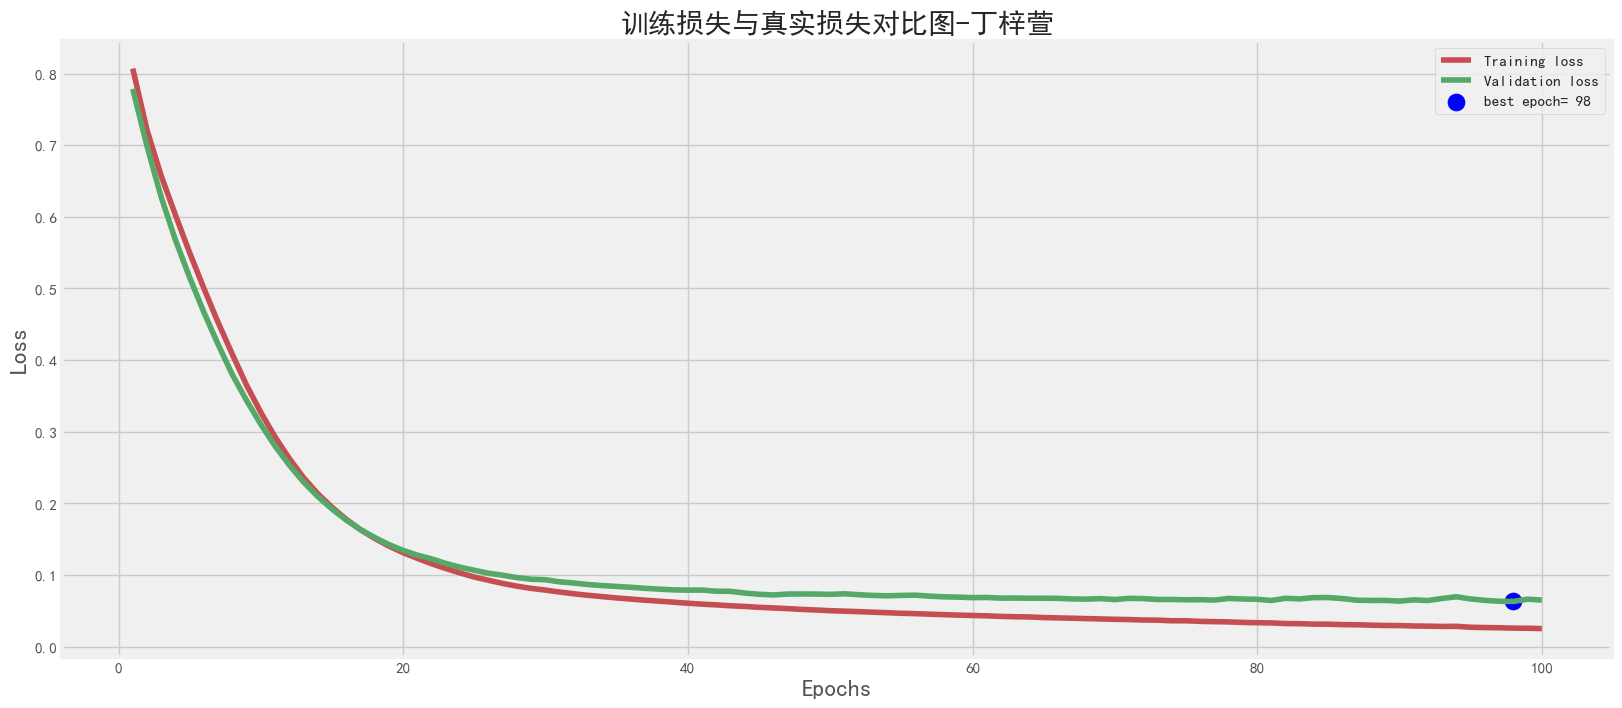

In [140]:
# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
plt.title('训练损失与真实损失对比图-丁梓萱')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

# 模型精度可视化

model 列包含了不同模型的名称。

score 列包含了每个模型的准确率，准确率乘以100后保留四位小数。

其中 log_reg_acc, gbc_acc, knn_acc, dtc_acc, svc_acc, GaussianNB_accuracy, rand_clf_acc, accuracy_mlp, accuracy_lda, xgb_accuracy, ann_accuracy 分别是不同模型的准确率变量。

In [141]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'GradientBoostingClassifier', 'KNN', 'Decision Tree Classifier', 'SVM',  'GaussianNB', 'Random Forest Classifier', 'Multi-layer Perceptron','Linear Discriminant Analysis', 'XgBoost','ANN'],
    'Score': [100*round(log_reg_acc,4), 100*round(gbc_acc,4), 100*round(knn_acc,4), 100*round(dtc_acc,4),100*round(svc_acc,4),100*round(GaussianNB_accuracy,4),100*round(rand_clf_acc,4), 100*round(accuracy_mlp,4), 100*round(accuracy_lda,4), 100*round(xgb_accuracy,4),100*round(ann_accuracy,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
4,SVM,98.25
6,Random Forest Classifier,98.25
7,Multi-layer Perceptron,98.25
10,ANN,98.25
0,Logistic Regression,96.49
1,GradientBoostingClassifier,96.49
2,KNN,95.61
8,Linear Discriminant Analysis,95.61
9,XgBoost,95.61
3,Decision Tree Classifier,94.74


plt.figure(figsize=(10, 7))设置绘图区域的大小，宽度为10英寸，高度为7英寸。

定义一个包含模型信息的列表，每个模型信息是一个字典，包含模型的标签和模型实例

model = m['model']：获取当前模型实例。
if 'keras_model' in m and m['keras_model']:：检查模型是否为Keras模型。
如果是Keras模型，使用 model.predict(X_test).ravel() 获取预测概率。
否则，先对非Keras模型进行训练 model.fit(X_train, y_train)，然后使用 model.predict_proba(X_test)[:, 1] 获取预测概率。
使用 metrics.roc_curve(y_test, y_proba) 计算假阳性率（FPR）和真阳性率（TPR）。
使用 metrics.roc_auc_score(y_test, y_proba) 计算AUC值。
使用 plt.plot(fpr, tpr, label='%s - ROC (area = %0.2f)' % (m['label'], auc)) 绘制ROC曲线并
绘制一条对角线（红色虚线），表示随机猜测的ROC曲线。
plt.savefig("roc_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')：保存图表为JPEG格式，分辨率为400 DPI，确保图表紧凑布局。
plt.show()：显示图表。e=12)

添加标签。


4/4 [==============================] - 0s 2ms/step


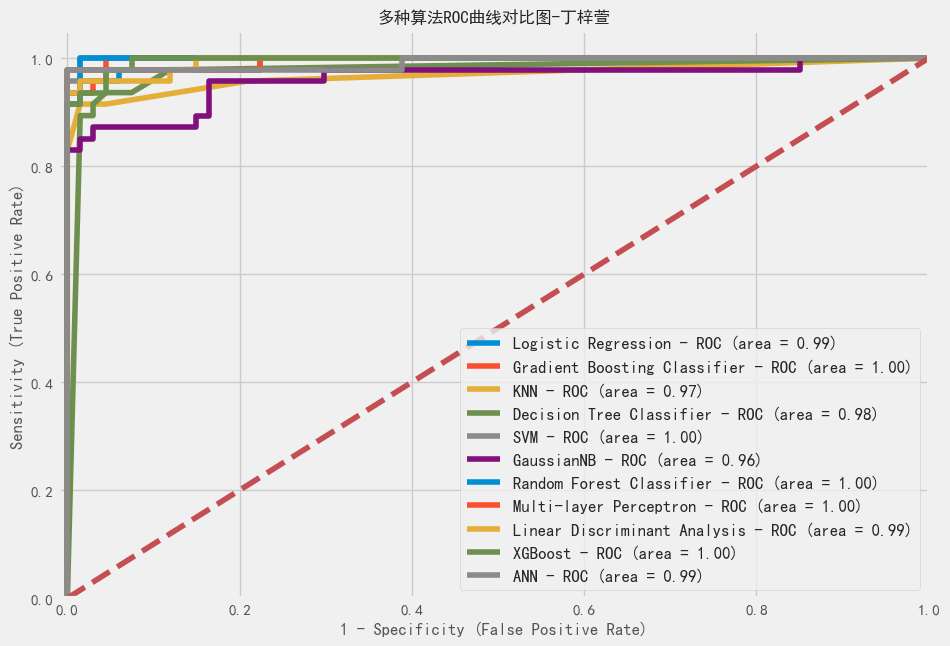

In [153]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# 评估多个模型的ROC曲线和AUC值
plt.figure(figsize=(10, 7))

models = [
    {'label': 'Logistic Regression', 'model': log_reg},
    {'label': 'Gradient Boosting Classifier', 'model': gbc},
    {'label': 'KNN', 'model': knn},
    {'label': 'Decision Tree Classifier', 'model': dtc},
    {'label': 'SVM', 'model': svc},
    {'label': 'GaussianNB', 'model': GaussianNB},
    {'label': 'Random Forest Classifier', 'model': rand_clf},
    {'label': 'Multi-layer Perceptron', 'model': mlp},
    {'label': 'Linear Discriminant Analysis', 'model': lda},
    {'label': 'XGBoost', 'model': xgb},
    {'label': 'ANN', 'model': nn_model, 'keras_model': True}
]
for m in models:
    model = m['model']
    
    if 'keras_model' in m and m['keras_model']:
        y_proba = model.predict(X_test).ravel()  # 注意这里使用 model 而不是 nn_model
    else:
        model.fit(X_train, y_train)
        y_proba = model.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)
    auc = metrics.roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('多种算法ROC曲线对比图-丁梓萱', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

means_accuracy = []和means_roc = []用于存储每个模型的准确率和ROC AUC值。

对于每个模型：
如果是Keras模型，通过 (model.predict(X_test) > 0.5).astype(int) 获取预测结果，通过 model.predict(X_test).ravel() 获取预测概率。
否则，先对模型进行训练 model.fit(X_train, y_train)，然后获取预测结果和预测概率。
使用 metrics.accuracy_score(y_test, y_pred) 计算准确率，并将其保存到 means_accuracy 列表。
使用 metrics.roc_curve(y_test, y_proba) 计算假阳性率（FPR）和真阳性率（TPR），然后使用 metrics.auc(fpr, tpr) 计算ROC AUC值，并将其保存到 means_roc 列表。

n_groups 是模型的数量。
index 是每个模型的索引。
bar_width 是每个柱状条的宽度。
opacity 是柱状条的透明度。

plt.bar 绘制两个柱状图，一个表示准确率，一个表示ROC AUC值。
设置x轴和y轴标签、图表标题以及x轴刻度标签。
使用 plt.legend 设置图例的位置和字体大小。
使用 plt.tight_layout() 确保布局紧凑。
使用 plt.savefig 保存图表为JPEG格式。
使用 plt.show() 显示图表。

4/4 [==============================] - 0s 2ms/step
Accuracy: [96.49, 96.49, 95.61, 94.74000000000001, 98.25, 89.47, 98.25, 98.25, 96.49, 95.61, 98.25]
ROC AUC: [99.36, 99.78, 96.82, 96.33, 99.94, 96.09, 99.83999999999999, 99.52, 99.4, 99.62, 99.17]


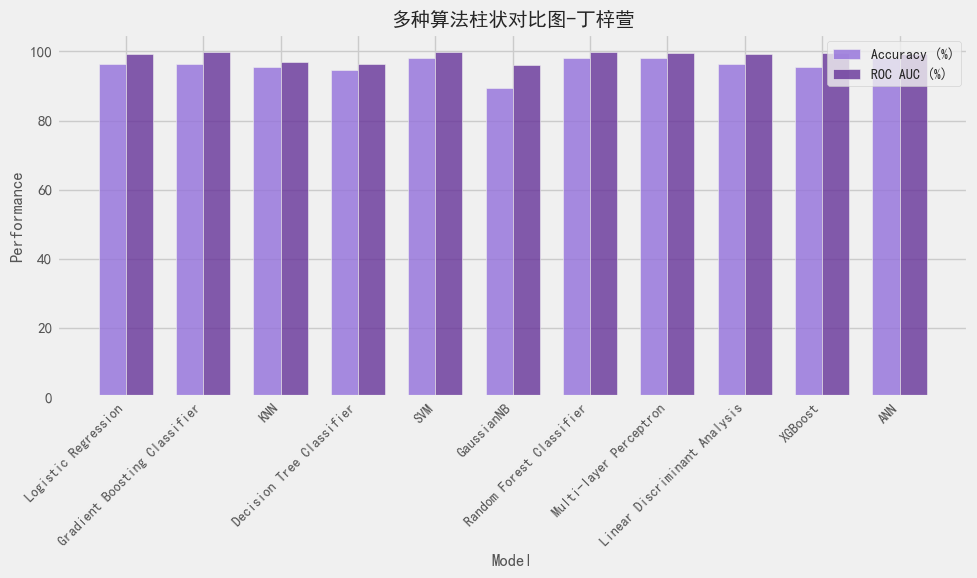

In [155]:
# 计算准确率和ROC AUC值
means_accuracy = []
means_roc = []

for m in models:
    model = m['model']
    
    if 'keras_model' in m and m['keras_model']:
        y_pred = (model.predict(X_test) > 0.5).astype(int)
        y_proba = model.predict(X_test).ravel()
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

    # 计算准确率
    acc = metrics.accuracy_score(y_test, y_pred)
    means_accuracy.append(100 * round(acc, 4))

    # 计算ROC曲线下面积（AUC）
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_proba)
    auc = metrics.auc(fpr, tpr)
    means_roc.append(100 * round(auc, 4))

# 打印准确率和ROC AUC值
print("Accuracy:", means_accuracy)
print("ROC AUC:", means_roc)

# 准备数据绘制柱状图
n_groups = len(models)
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

# 绘制柱状图
plt.figure(figsize=(10, 6))

plt.bar(index, means_accuracy, bar_width, alpha=opacity, color='mediumpurple', label='Accuracy (%)')
plt.bar(index + bar_width, means_roc, bar_width, alpha=opacity, color='rebeccapurple', label='ROC AUC (%)')

plt.xlabel('Model', fontsize=12)
plt.ylabel('Performance', fontsize=12)
plt.title('多种算法柱状对比图-丁梓萱', fontsize=14)
plt.xticks(index + bar_width / 2, [m['label'] for m in models], rotation=45, ha='right', fontsize=10)
plt.legend(loc='upper right', fontsize=10)
plt.tight_layout()
plt.savefig("PE_breast_cancer.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

plt.figure(figsize=(15, 10))设置绘图区域大小（宽15英寸，高10英寸）

for i, m in enumerate(models): 遍历每个模型，并使用 enumerate 获取模型的索引 i。
plt.subplot(3, 4, i+1) 创建一个3行4列的子图布局，并选择当前的子图。
如果模型是Keras模型，使用 model.predict(X_test) 并将结果转为整数类型。
否则，使用 model.predict(X_test) 获取预测结果。
使用 confusion_matrix(y_test, y_pred) 计算混淆矩阵。
使用 sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False) 绘制混淆矩阵热图，注释数字、使用蓝色配色方案并隐藏颜色条。
设置子图标题为模型标签。

plt.tight_layout() 自动调整子图参数，以适应绘图区域并防止重叠。
plt.show() 显示图表。

4/4 [==============================] - 0s 559us/step


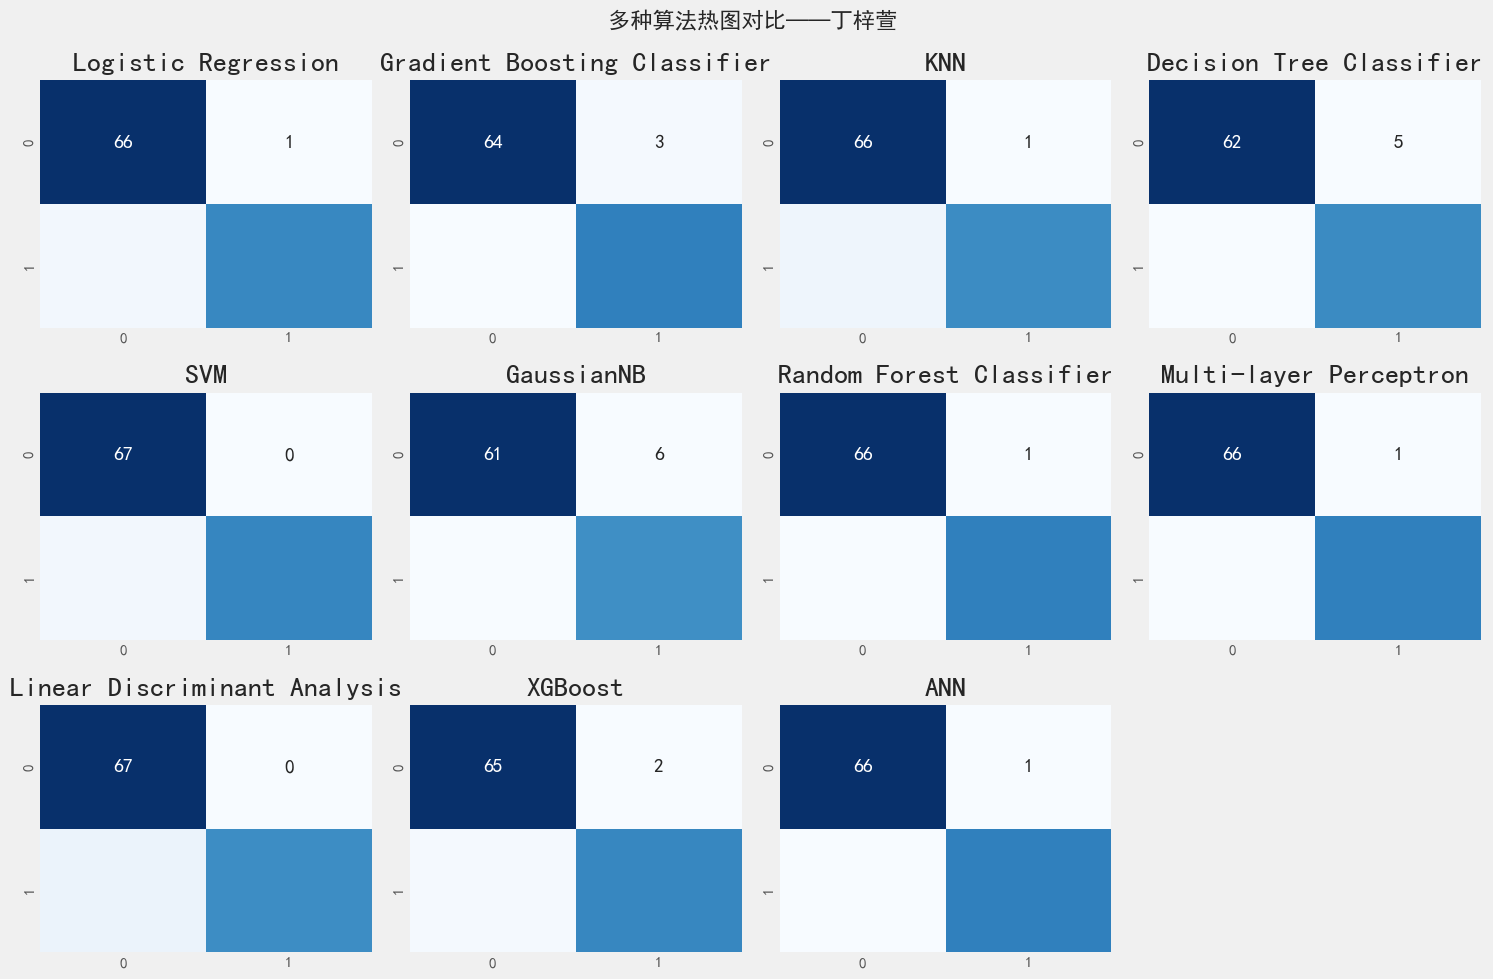

In [152]:
plt.figure(figsize=(15, 10))
plt.suptitle("多种算法热图对比——丁梓萱", fontsize=16)

for i, m in enumerate(models):
    model = m['model']
    plt.subplot(3, 4, i+1)
    
    if 'keras_model' in m and m['keras_model']:
        y_pred = (model.predict(X_test) > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title(m['label'])

plt.tight_layout()
plt.show()
